# Main Notebook: Data Preprocessing, Feature Engineering, Scaling, and Splitting

s

## Step 1: Import Libraries and Configuration
In this step, we import necessary libraries and configurations to set up our environment.

In [2]:
import json
import pandas as pd # type: ignore
import sys
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Add the utils and scripts directories to the Python path
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..', 'utils'))
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..', 'scripts'))

# Load configuration file from the main directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
config_path = os.path.join(notebook_dir, '..', 'config.json')

print(f"Config path: {config_path}")
with open(config_path, 'r') as f:
    config = json.load(f)

# Convert relative paths in the configuration file to absolute paths
project_root = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
raw_data_path = os.path.join(project_root, config['raw_data_path'])
interim_cleaned_data_path = os.path.join(project_root, config['interim_cleaned_data_path'])
preprocessed_data_path = os.path.join(project_root, config['preprocessed_data_path'])

# Paths for saving training and testing datasets
train_path = os.path.join(project_root, 'data', 'train', 'train_dataset.csv')
test_path = os.path.join(project_root, 'data', 'test', 'test_dataset.csv')

# Path for saving the processed dataset with new features
processed_data_path = os.path.join(project_root, 'data', 'processed', 'processed_dataset_with_features.csv')

# Path for saving EDA figures
eda_figures_path = os.path.join(project_root, 'Data_Preparation', 'eda_visualizations')
os.makedirs(eda_figures_path, exist_ok=True)

Config path: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\notebooks\..\config.json


## Step 2: Import Custom Modules
In this step, we import custom modules for data loading, cleaning, feature engineering, scaling, and exploratory data analysis (EDA).

In [3]:
from data_loader import load_data
from data_cleaner import clean_data
from data_splitter import split_data
from feature_engineering import create_new_features
from scaler import apply_standard_scaling, apply_min_max_scaling
from eda_utils import plot_distribution, plot_boxplots, plot_categorical, plot_correlation_matrix, plot_pairplots


Executing data_loader.py


## Step 3: Load and Clean Data
Load the raw dataset from the specified path and clean it using the clean_data function.

In [4]:
# Load the raw data from the specified path
df = load_data(raw_data_path)
# Check if data is loaded correctly; if not, print an error message and exit
if df is None:
    print(f"File not found at {raw_data_path}. Exiting the script.")
else:
    print(f"Raw data loaded successfully from {raw_data_path}")
    display(df.head())

Data loaded successfully from C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\data/raw/Dataset (ATS)-1.csv
Raw data loaded successfully from C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\data/raw/Dataset (ATS)-1.csv


gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      34          Yes            No   
2    Male              0         No       2          Yes            No   
3    Male              0         No      45           No            No   
4  Female              0         No       2          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month           29.85    No  
1             DSL        One year           56.95    No  
2             DSL  Month-to-month           53.85   Yes  
3             DSL        One year           42.30    No  
4     Fiber optic  Month-to-month           70.70   Yes

In [5]:
# Clean the loaded data using the clean_data function
df_cleaned = clean_data(df)
# Check if data cleaning was successful; if not, print an error message and exit
if df_cleaned is None:
    print("Data cleaning failed. Exiting the script.")
else:
    print("Data cleaned successfully.")
    display(df_cleaned.head())

Missing values handled by dropping rows with missing values.
Categorical columns identified: Index(['gender', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'Contract', 'Churn'],
      dtype='object')
Categorical columns ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn'] encoded.
Data cleaned successfully.


SeniorCitizen  tenure  MonthlyCharges  gender_Female  gender_Male  \
0              0       1           29.85            1.0          0.0   
1              0      34           56.95            0.0          1.0   
2              0       2           53.85            0.0          1.0   
3              0      45           42.30            0.0          1.0   
4              0       2           70.70            1.0          0.0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0            1.0             0.0              1.0               0.0   
1            1.0             0.0              0.0               1.0   
2            1.0             0.0              0.0               1.0   
3            1.0             0.0              1.0               0.0   
4            1.0             0.0              0.0               1.0   

   MultipleLines_No  MultipleLines_Yes  InternetService_DSL  \
0               1.0                0.0                  1.0   
1               1.0                0.0                  1.0   
2               1.0                0.0                  1.0   
3               1.0                0.0                  1.0   
4               1.0                0.0                  0.0   

   InternetService_Fiber optic  Contract_Month-to-month  Contract_One year  \
0                          0.0                      1.0                0.0   
1                          0.0                      0.0                1.0   
2                          0.0                      1.0                0.0   
3                          0.0                      0.0                1.0   
4                          1.0                      1.0                0.0   

   Contract_Two year  Churn_No  Churn_Yes  
0                0.0       1.0        0.0  
1                0.0       1.0        0.0  
2                0.0       0.0        1.0  
3                0.0       1.0        0.0  
4                0.0       0.0        1.0

## Step 4: Perform Exploratory Data Analysis (EDA)
Perform EDA on the cleaned dataset to gain insights and visualize distributions, correlations, and relationships.

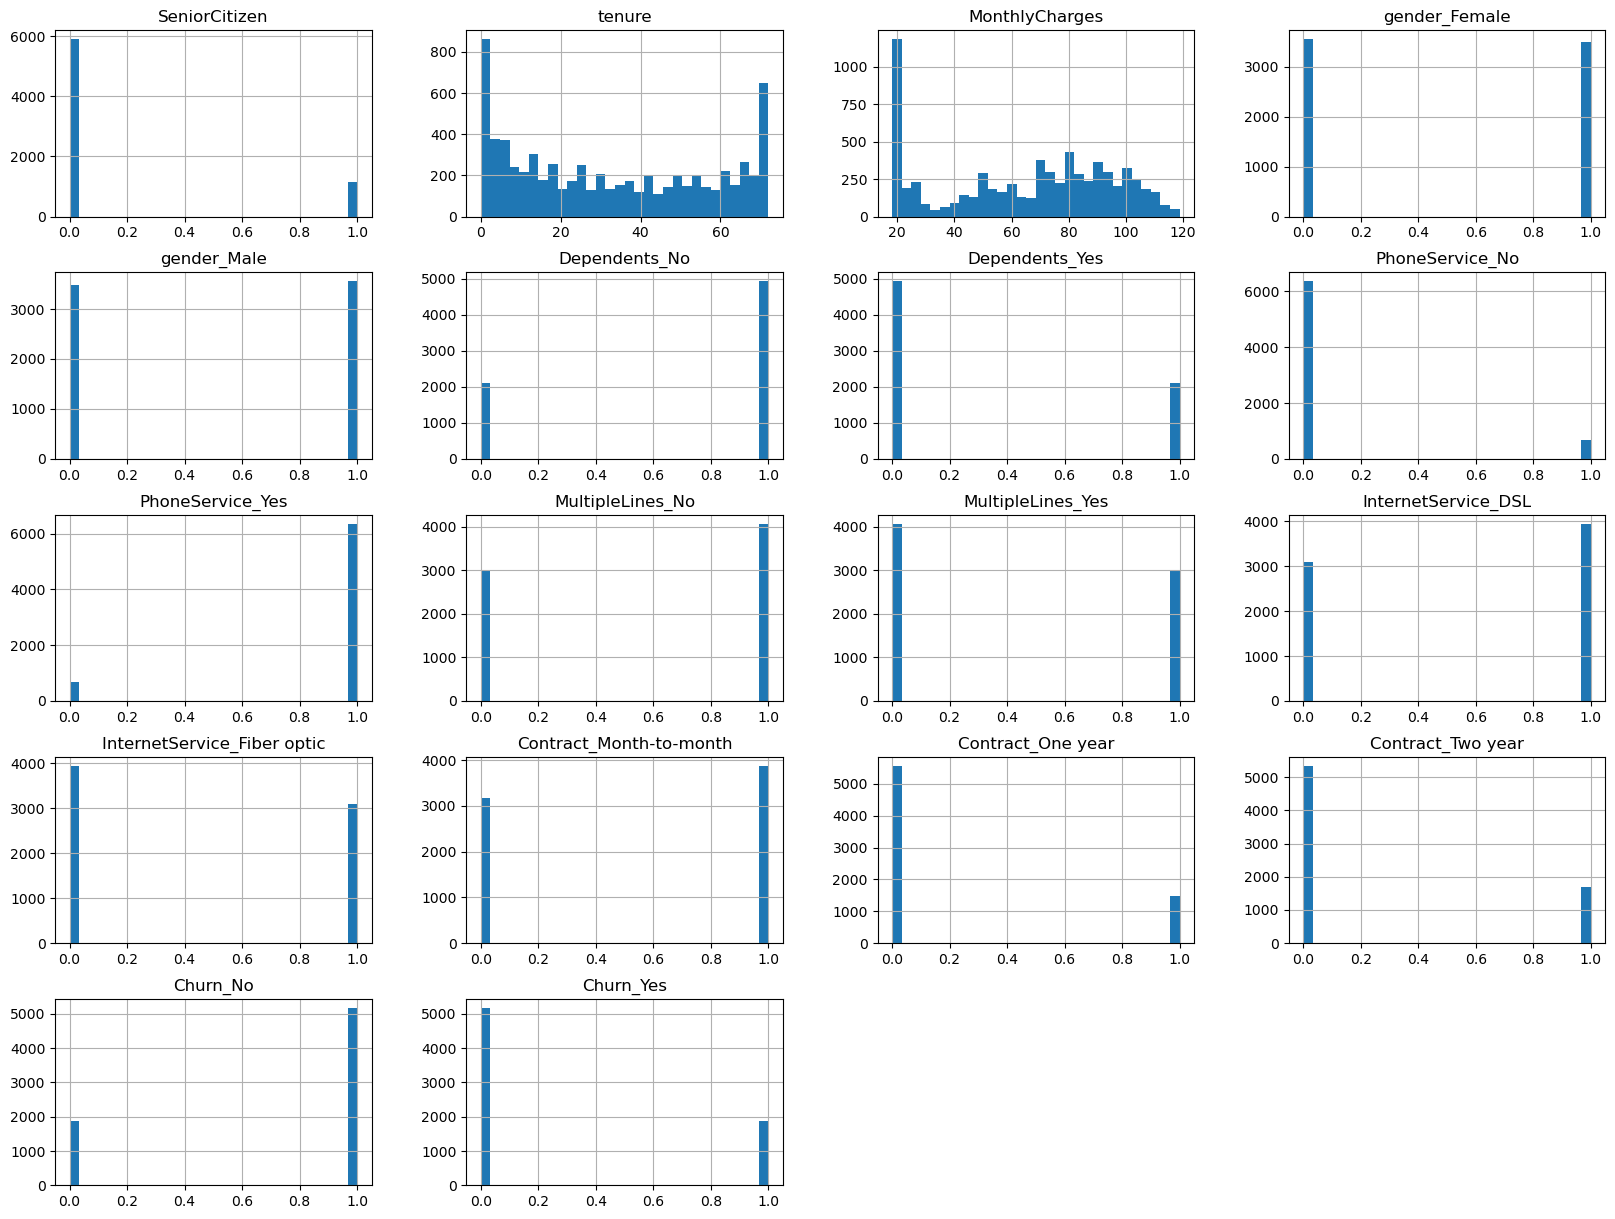

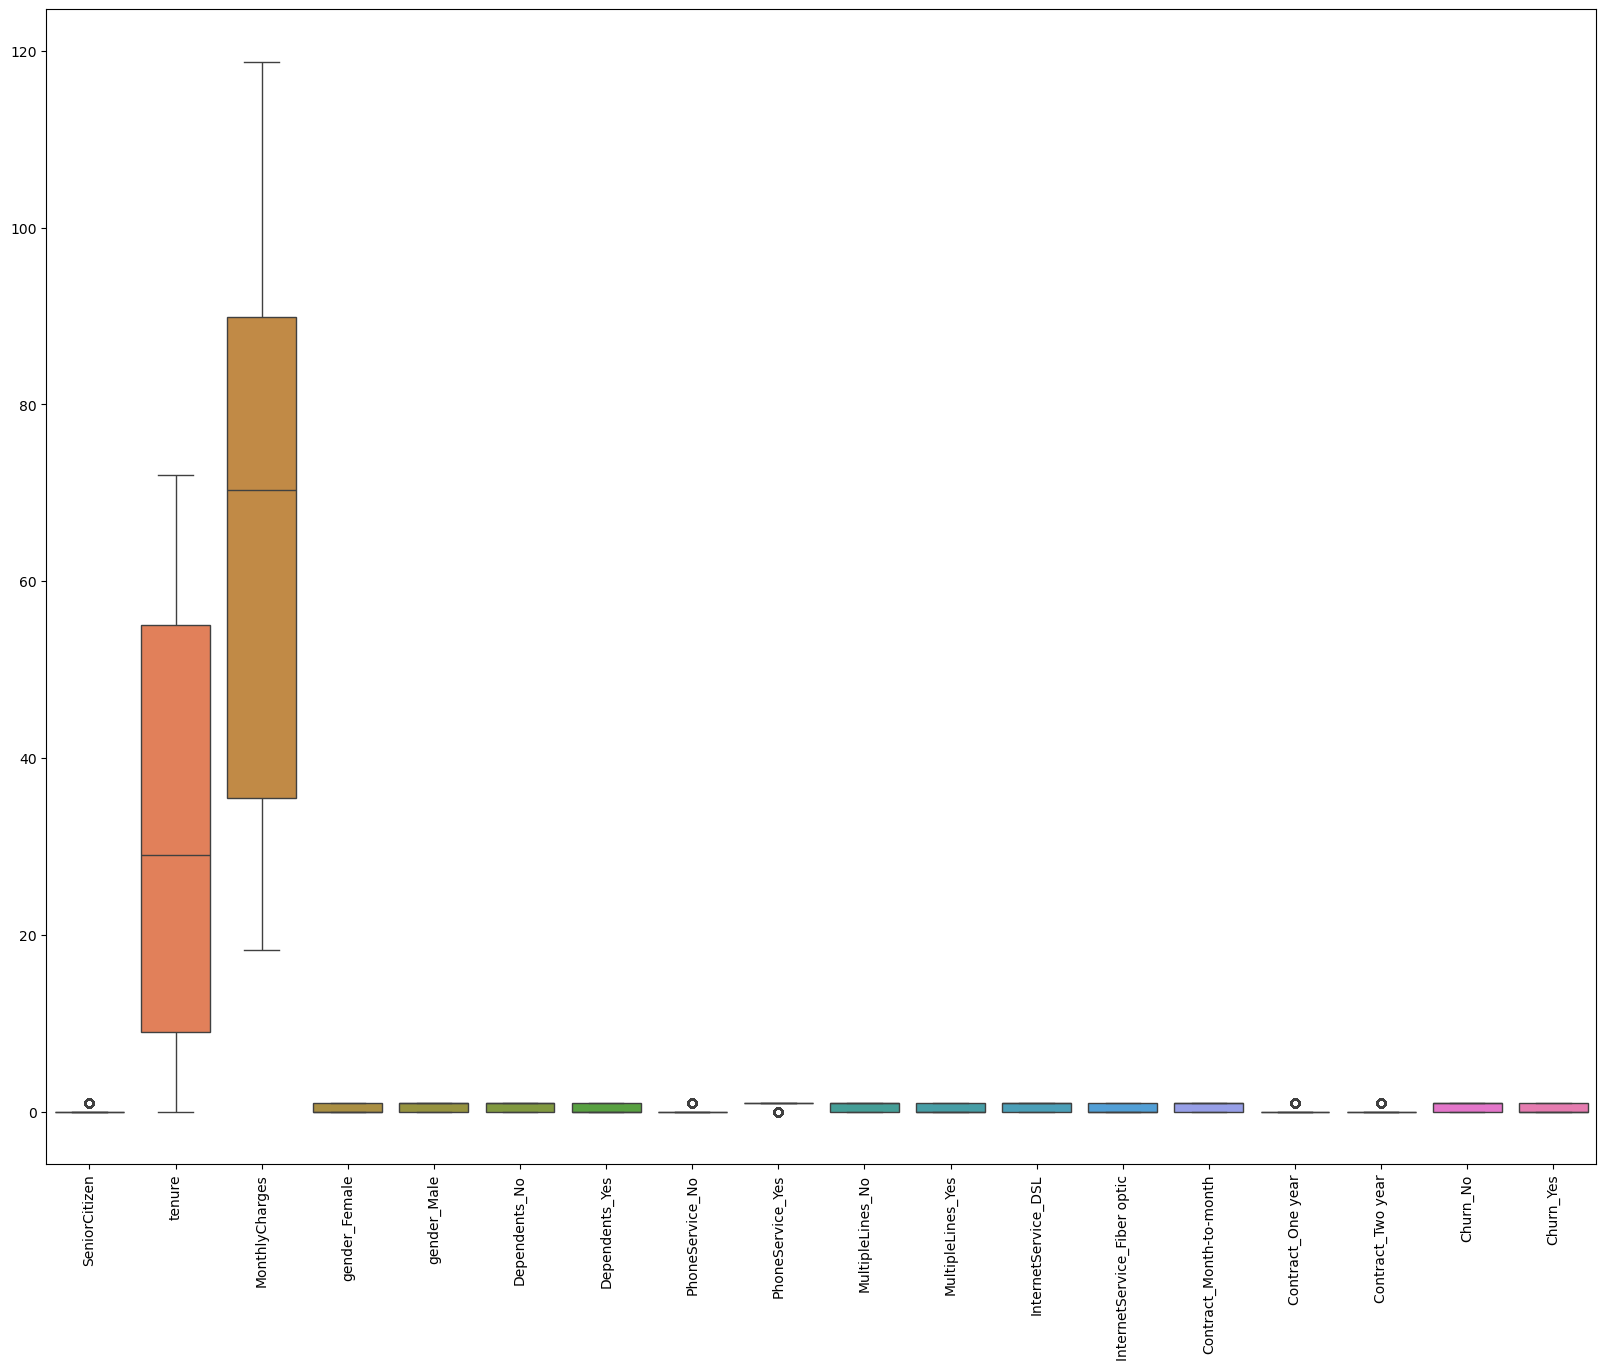

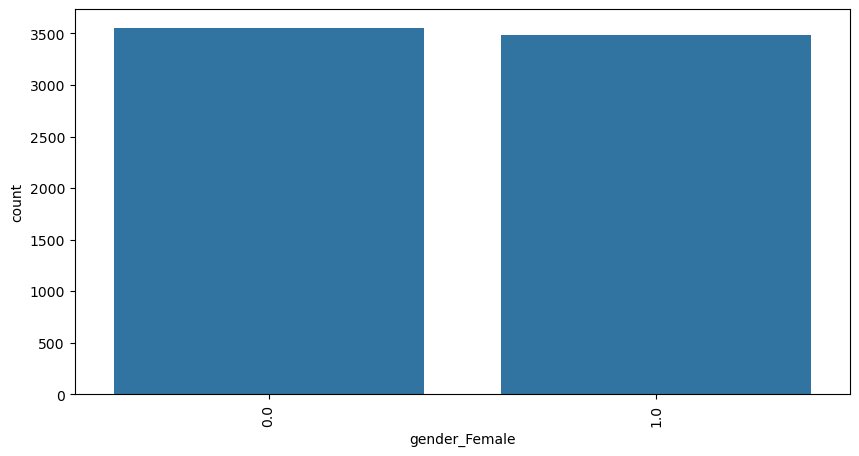

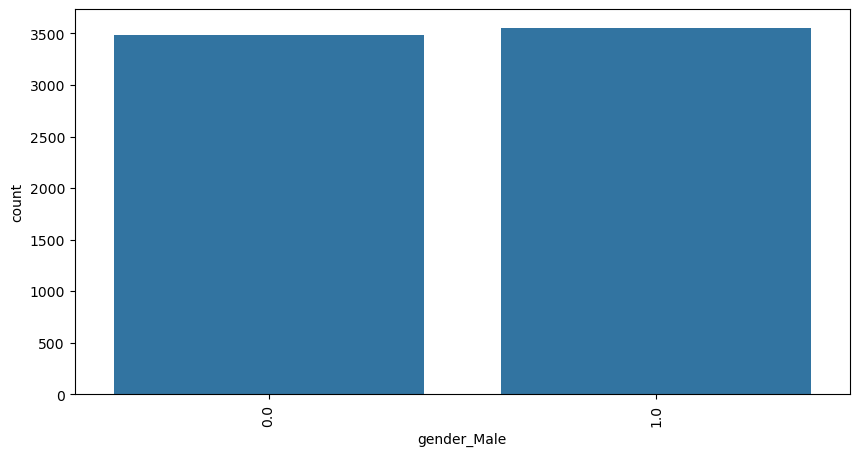

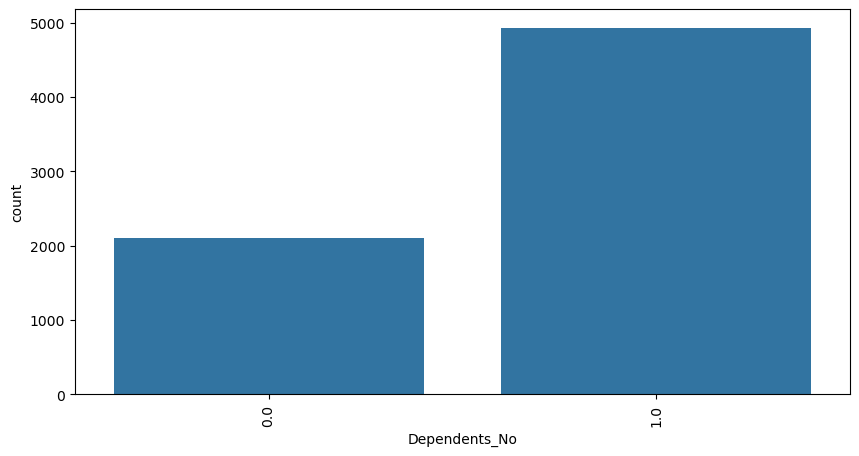

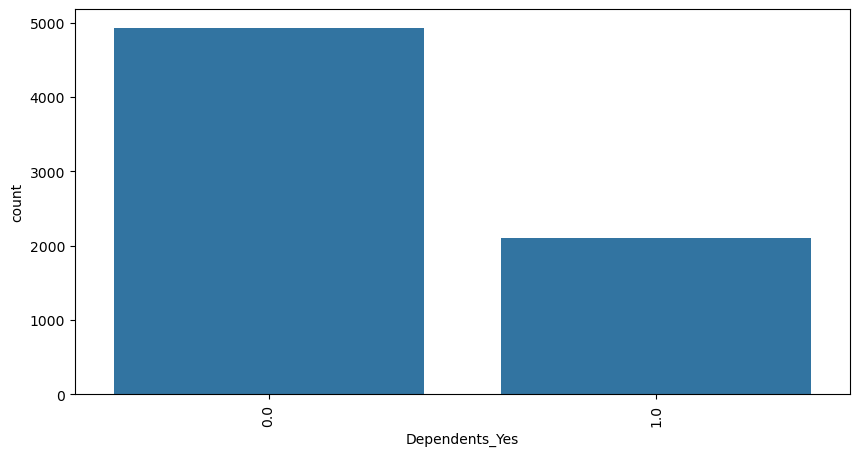

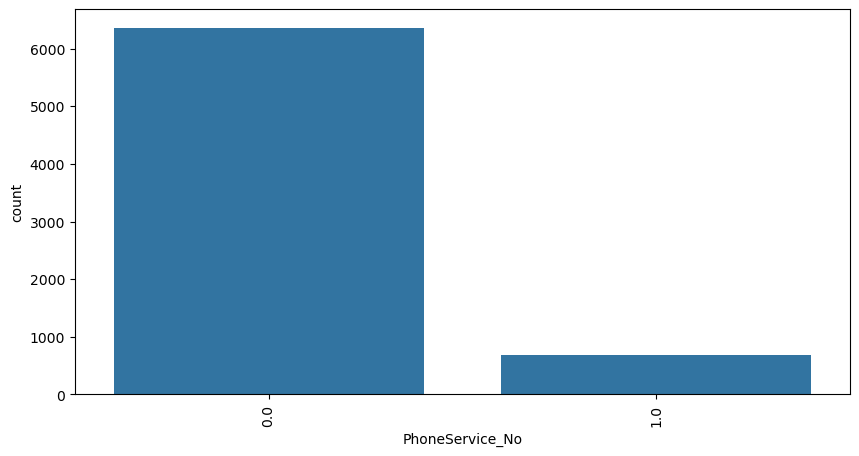

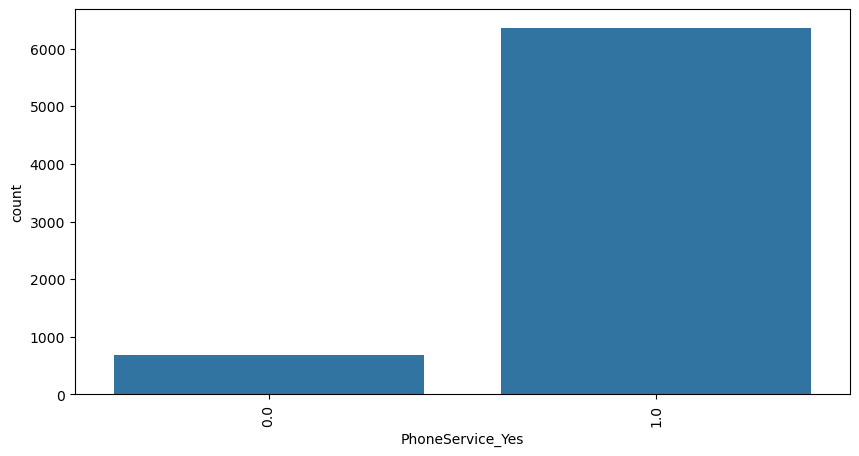

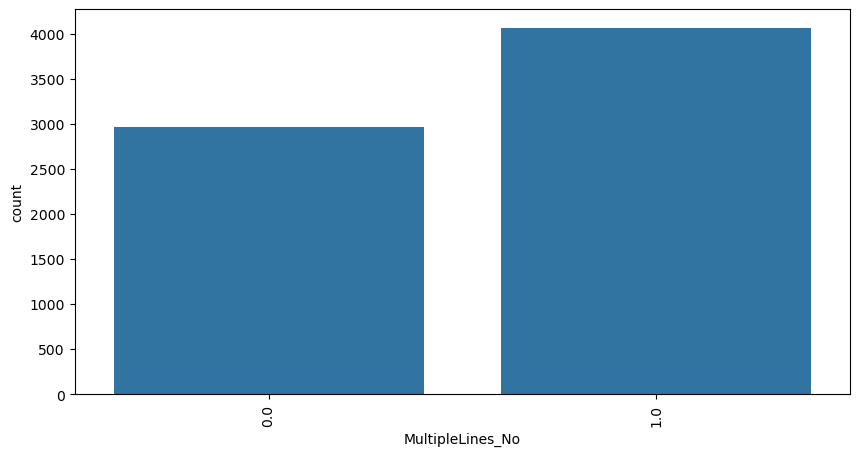

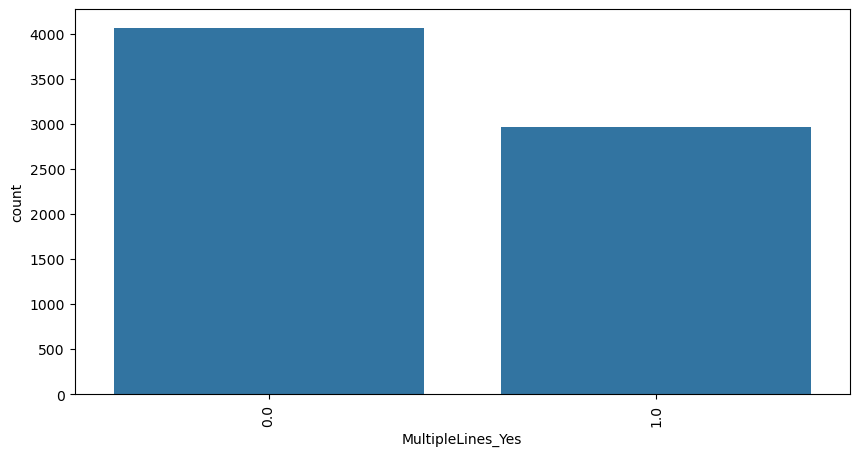

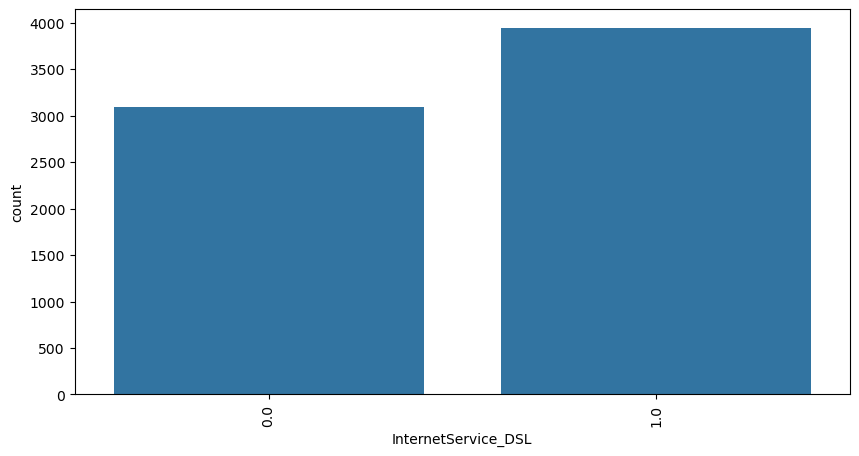

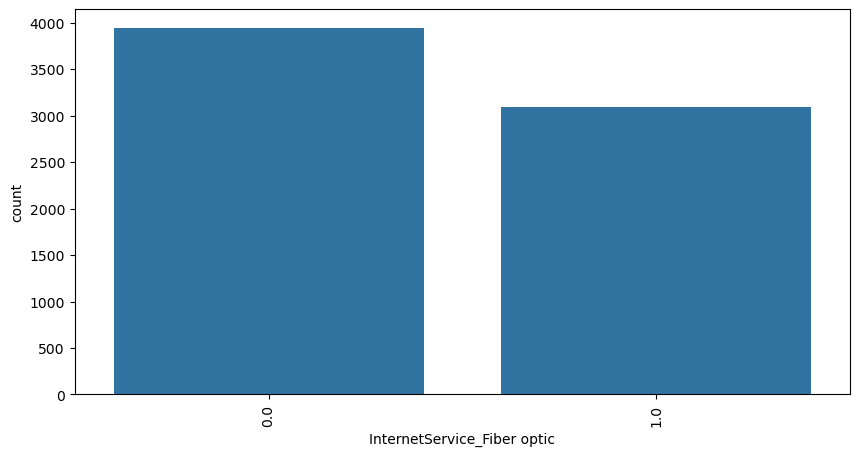

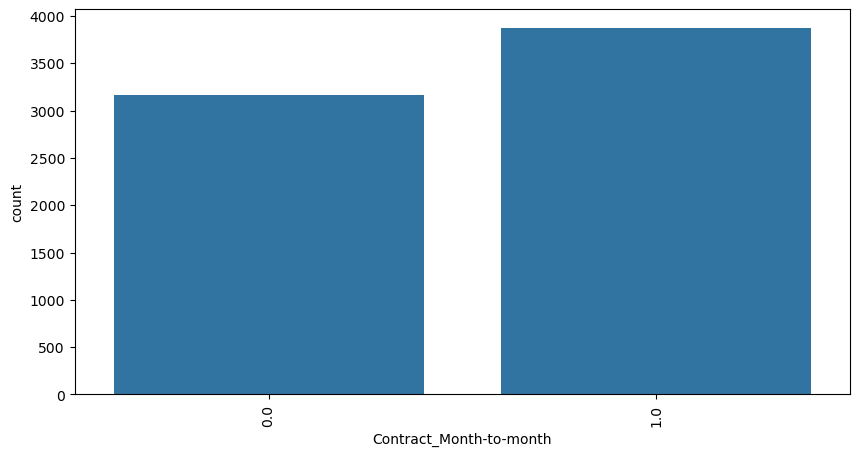

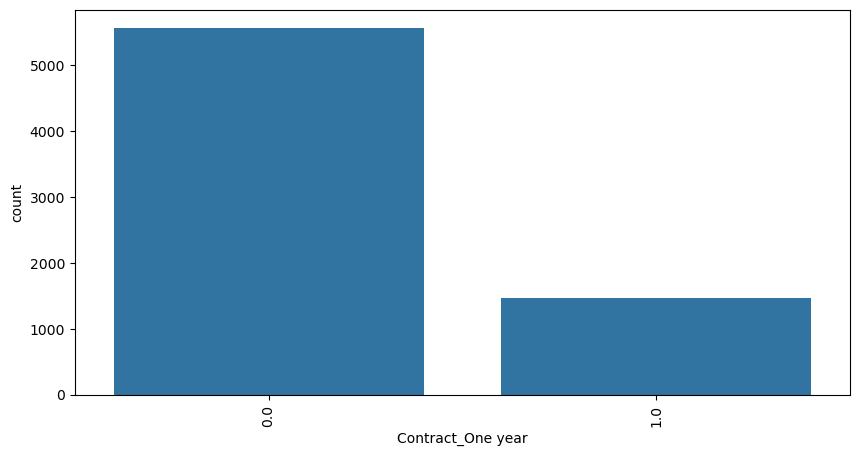

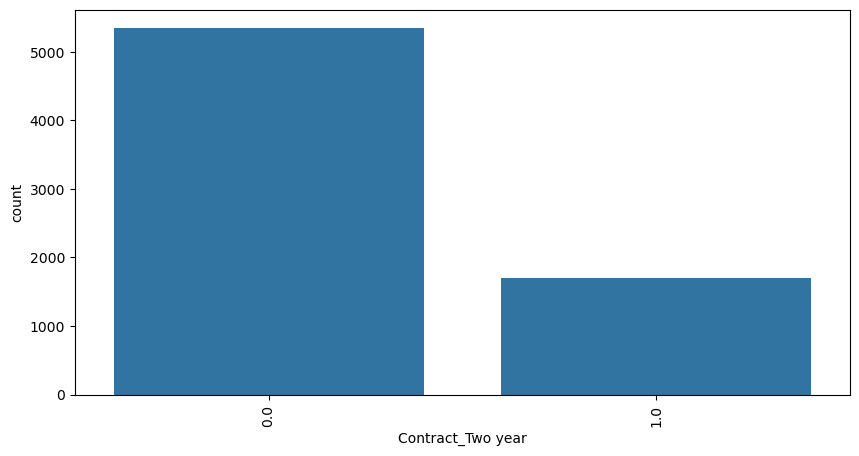

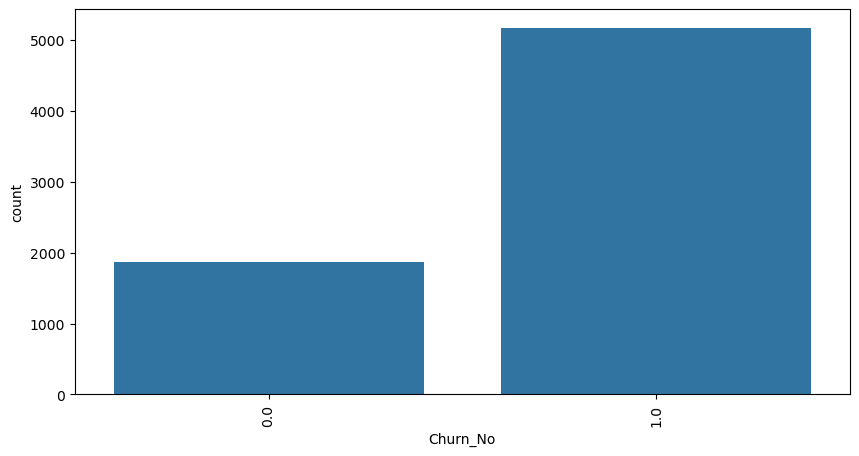

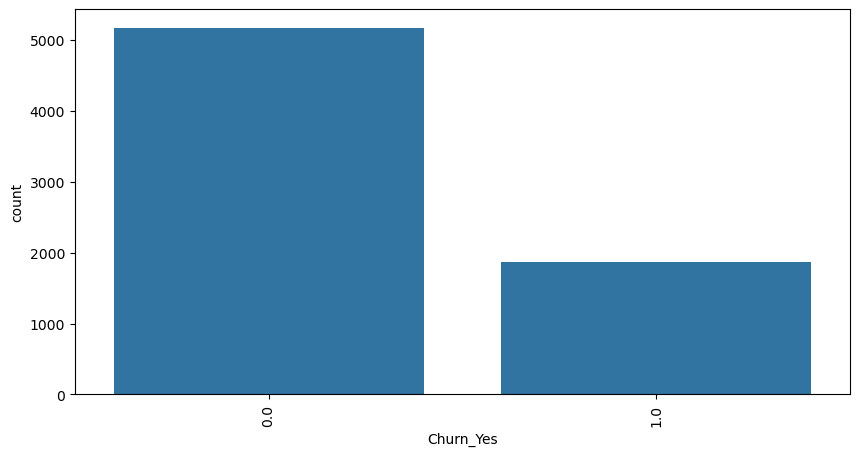

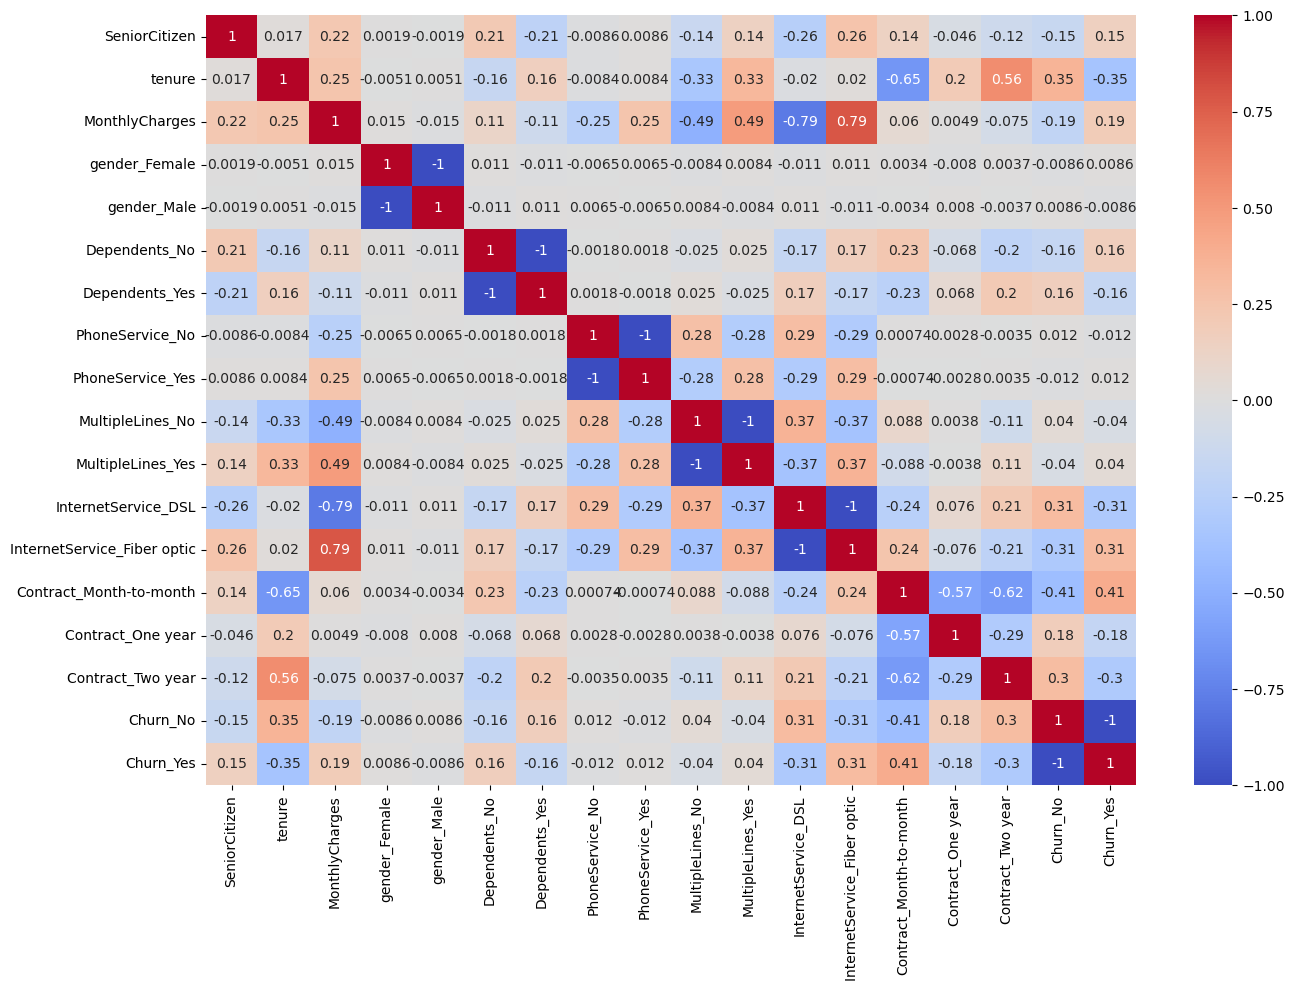

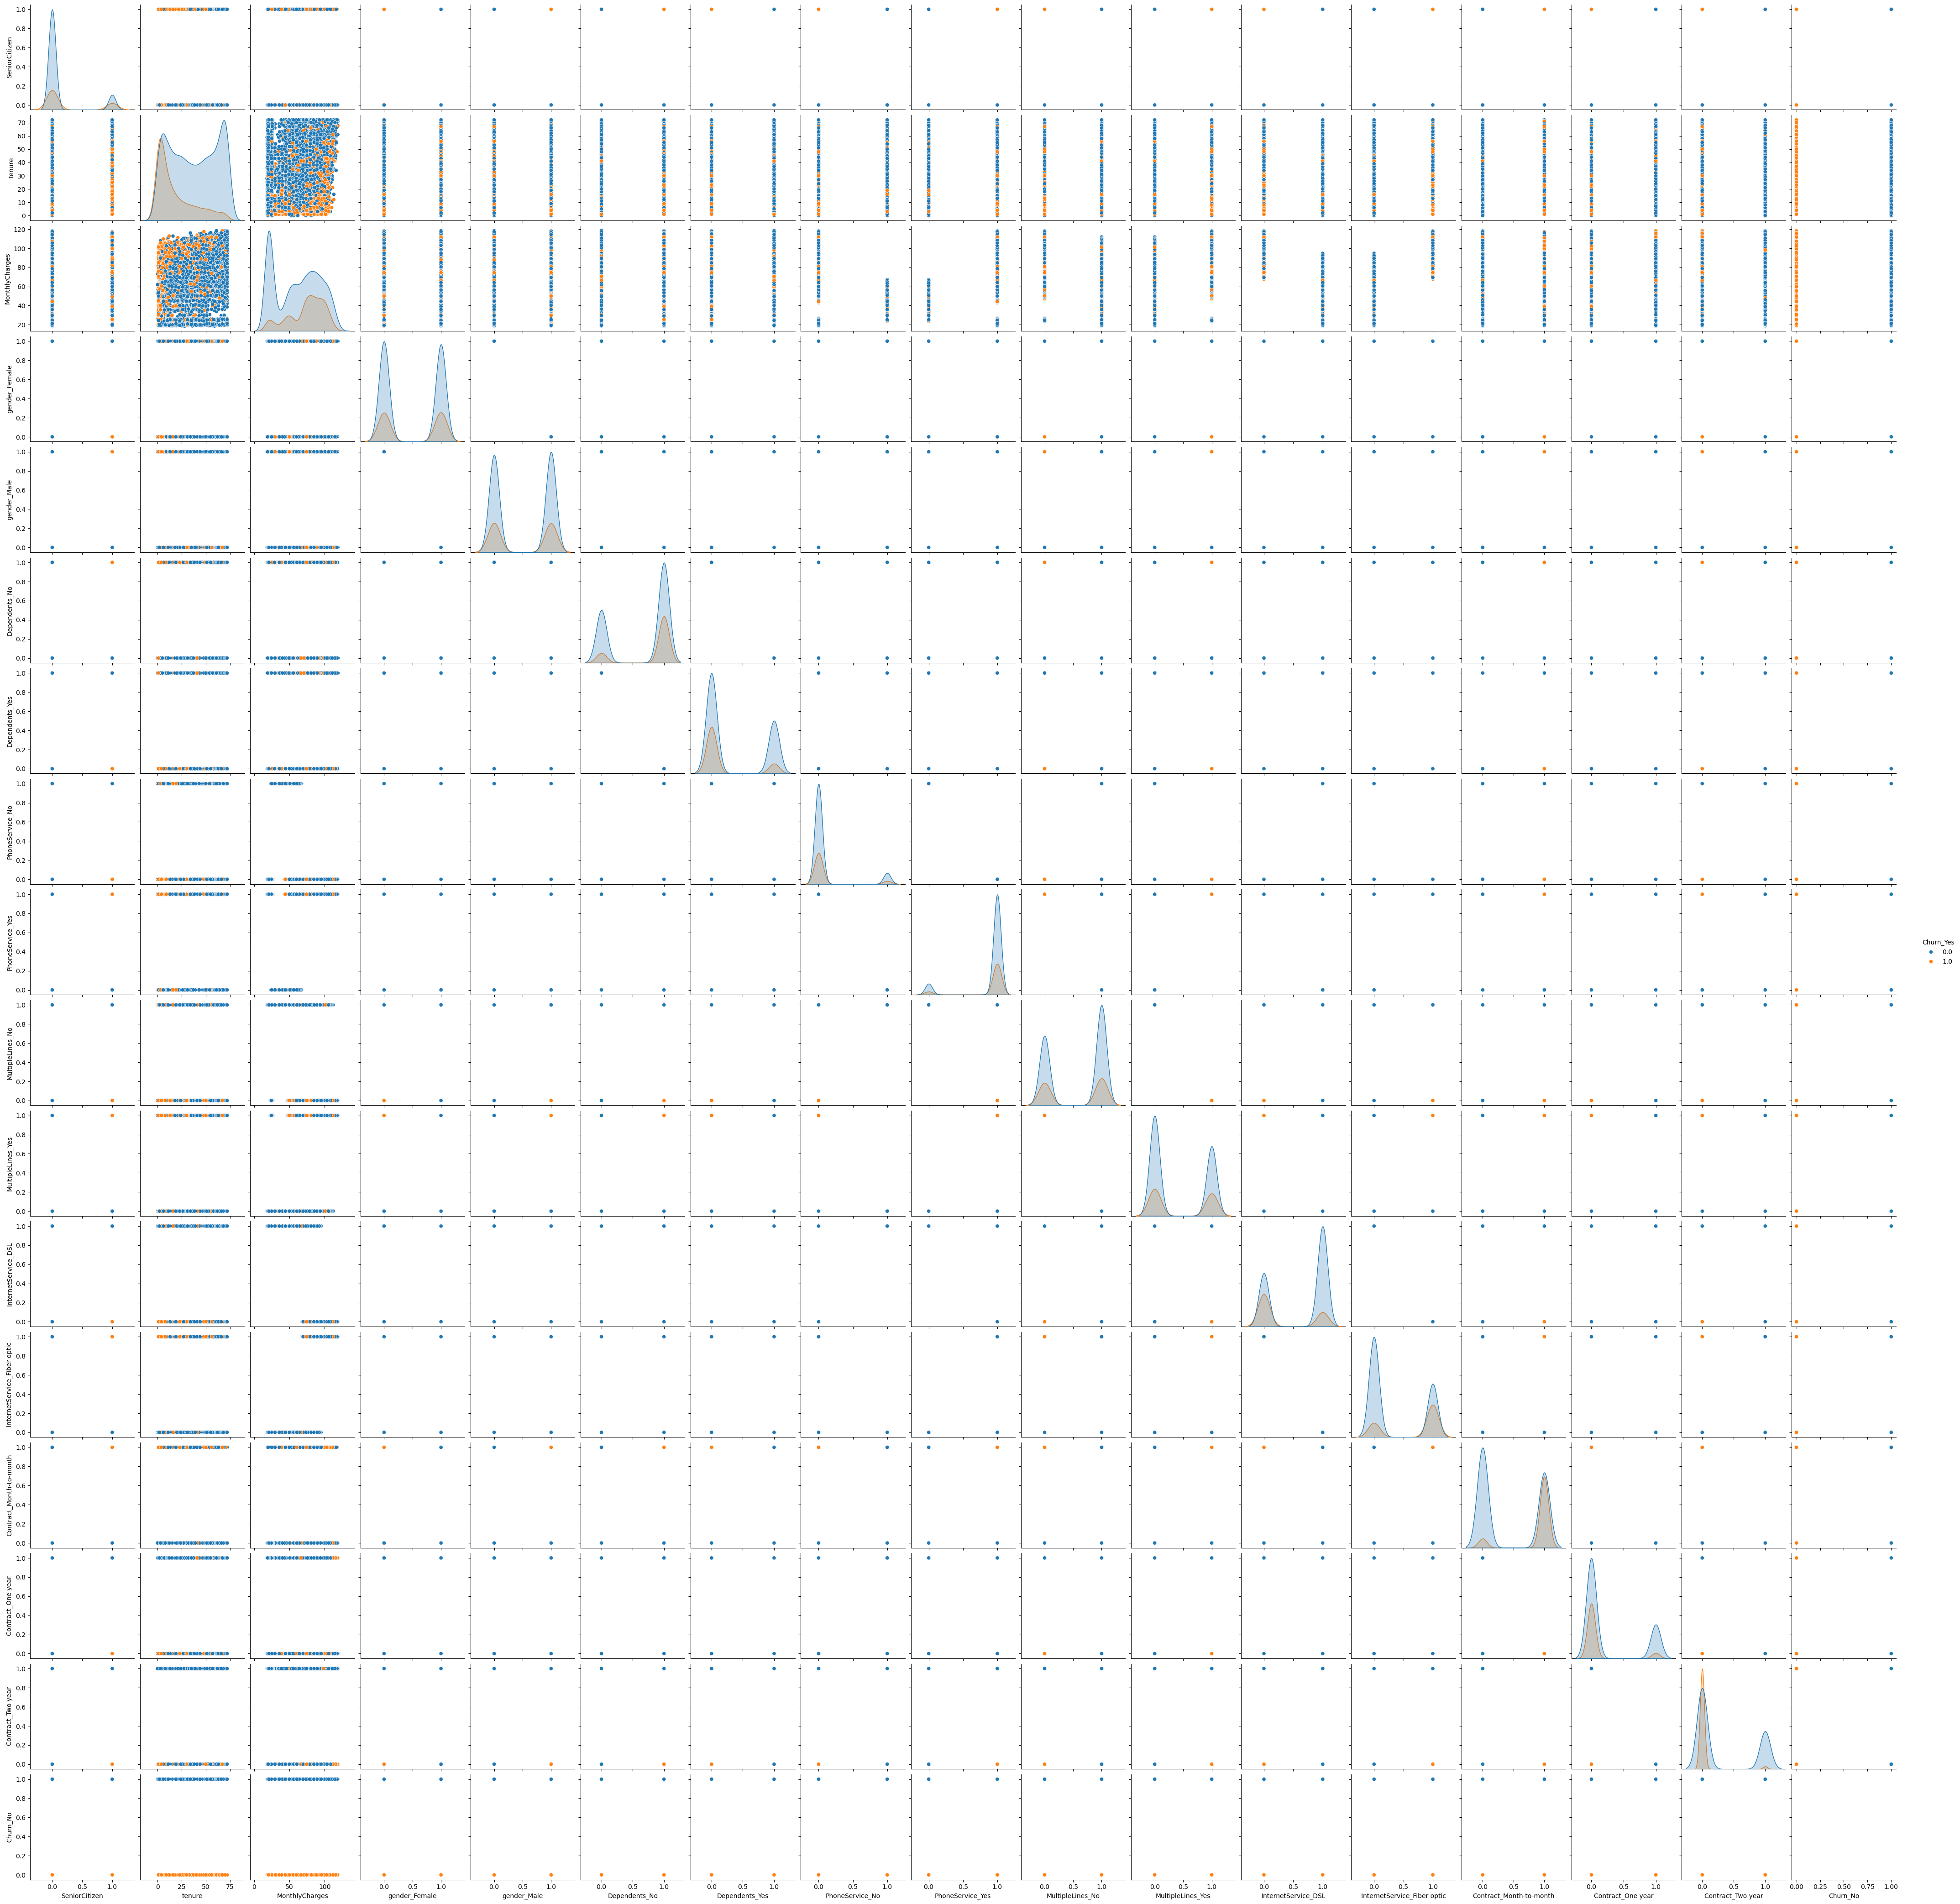

In [6]:
def perform_eda(df):
    """
    Perform exploratory data analysis on the dataframe.
    """
    # Plot distributions
    plot_distribution(df, df.columns)

    # Plot boxplots
    plot_boxplots(df, df.columns)

    # Plot categorical variables
    categorical_columns = ['gender_Female', 'gender_Male', 'Dependents_No', 'Dependents_Yes',
                           'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
                           'InternetService_DSL', 'InternetService_Fiber optic', 'Contract_Month-to-month',
                           'Contract_One year', 'Contract_Two year', 'Churn_No', 'Churn_Yes']
    plot_categorical(df, categorical_columns)

    # Plot correlation matrix
    plot_correlation_matrix(df)

    # Plot pairplots
    plot_pairplots(df, hue='Churn_Yes')

# Perform EDA before feature engineering
perform_eda(df_cleaned)


## Step 5: Apply Scaling Techniques
Apply standard scaling and min-max scaling to the dataset to standardize the features.

In [ ]:
# Apply scaling techniques
df_standard_scaled = apply_standard_scaling(df_cleaned)
df_min_max_scaled = apply_min_max_scaling(df_cleaned)

# Save the scaled datasets
standard_scaled_data_path = os.path.join(project_root, 'Data_Preparation', 'scaling_techniques', 'standard_scaled_dataset.csv')
min_max_scaled_data_path = os.path.join(project_root, 'Data_Preparation', 'scaling_techniques', 'min_max_scaled_dataset.csv')
df_standard_scaled.to_csv(standard_scaled_data_path, index=False)
df_min_max_scaled.to_csv(min_max_scaled_data_path, index=False)
print(f"Standard scaled data saved to {standard_scaled_data_path}")
print(f"Min-Max scaled data saved to {min_max_scaled_data_path}")

## Step 6: Feature Engineering
Create new features from the cleaned dataset to enhance the dataset for further analysis and modeling.

In [ ]:
# Create new features from the cleaned dataset
df_features = create_new_features(df_cleaned)
# Save the dataset with new features to the processed path
df_features.to_csv(processed_data_path, index=False)
print(f"Dataset with new features saved to {processed_data_path}")
display(df_features.head())

## Step 7: Split Data into Training and Testing Sets
In this step, we will split the processed data with new features into training and testing datasets for model training and evaluation.



In [ ]:
# Define the target column
target_column = 'Churn_Yes'

# Split the processed data with new features into training and testing datasets
train_df, test_df = split_data(df_features, target_column=target_column)

# Save the training and testing datasets to their respective paths
train_path = os.path.join(project_root, 'data', 'train', 'train_dataset.csv')
test_path = os.path.join(project_root, 'data', 'test', 'test_dataset.csv')

train_path_prep = os.path.join(project_root, 'Data_Preparation', 'training_sets', 'train_dataset.csv')
test_path_prep = os.path.join(project_root, 'Data_Preparation', 'testing_sets', 'test_dataset.csv')

os.makedirs(os.path.dirname(train_path), exist_ok=True)
os.makedirs(os.path.dirname(test_path), exist_ok=True)
os.makedirs(os.path.dirname(train_path_prep), exist_ok=True)
os.makedirs(os.path.dirname(test_path_prep), exist_ok=True)

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
train_df.to_csv(train_path_prep, index=False)
test_df.to_csv(test_path_prep, index=False)

print(f"Training dataset saved to {train_path} and {train_path_prep}")
print(f"Testing dataset saved to {test_path} and {test_path_prep}")

## Overall Summary

In this notebook, we have successfully performed the following tasks:
 - Data Loading and Cleaning: Loaded the raw dataset and cleaned it to handle missing values and encode categorical variables.
 - Exploratory Data Analysis (EDA): Conducted EDA to visualize distributions, correlations, and relationships within the dataset.
 - Feature Engineering: Created new features to enhance the dataset for better analysis and modeling.
 - Scaling: Applied standard scaling and min-max scaling to standardize the features.
 - Data Splitting: Split the dataset into training and testing sets for model training and evaluation.

## Results Obtained:
 - Cleaned and transformed dataset ready for analysis.
 - Visualizations and insights from EDA.
 - New features added to the dataset.
 - Scaled datasets saved for further analysis.
 - Training and testing datasets saved for model development.

## Next Steps:
 - Model Training: Use the training dataset to train various machine learning models.
 - Model Evaluation: Evaluate the performance of the trained models using the testing dataset.
 - Model Selection: Select the best-performing model based on evaluation metrics.
 - Deployment: Prepare the selected model for deployment in a real-world environment.

# Clustering Analysis with Visualization

In this section, we perform clustering analysis on the datasets obtained from the data processing stage above. The Min-Max scaled and Standard scaled datasets are loaded and used for future analysis. After clustering, we will visualize the clusters to better understand customer segments.

## Loading the Min-Max and Standard Scaled Datasets
The datasets were processed by the data team and saved during the data preprocessing stage. We load these datasets to apply clustering algorithms.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

# Load the Min-Max scaled dataset
df_min_max_scaled = pd.read_csv(min_max_scaled_data_path)
print(f"Min-Max scaled data loaded successfully from {min_max_scaled_data_path}")

# Load the Standard scaled dataset
df_standard_scaled = pd.read_csv(standard_scaled_data_path)
print(f"Standard scaled data loaded successfully from {standard_scaled_data_path}")

# Display the first few rows of each dataset to verify the load was successful
print("Min-Max Scaled Data:")
print(df_min_max_scaled.head())

print("Standard Scaled Data:")
print(df_standard_scaled.head())


Min-Max scaled data loaded successfully from C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Data_Preparation\scaling_techniques\min_max_scaled_dataset.csv
Standard scaled data loaded successfully from C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Data_Preparation\scaling_techniques\standard_scaled_dataset.csv
Min-Max Scaled Data:
   SeniorCitizen    tenure  MonthlyCharges  gender_Female  gender_Male  \
0            0.0  0.013889        0.115423            1.0          0.0   
1            0.0  0.472222        0.385075            0.0          1.0   
2            0.0  0.027778        0.354229            0.0          1.0   
3            0.0  0.625000        0.239303            0.0          1.0   
4            0.0  0.027778        0.521891            1.0          0.0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0            1.0             0.0              1.0               0.0   
1            1.0             0.0              0.

## Apply K-means Clustering and Visualize Clusters
Define a function to apply K-means clustering to the dataset and generate visualizations of the clusters. This function will also save the visualizations to a specified directory

In [16]:

def apply_kmeans_and_visualize(df, scaling_label, n_clusters):
    # Define path for saving visualizations inside the function
    visualizations_path = os.path.join(project_root, 'Clustering_Analysis', 'visualizations')
    os.makedirs(visualizations_path, exist_ok=True)
    
    # Use only the 'tenure' and 'MonthlyCharges' columns for clustering
    features = df[['tenure', 'MonthlyCharges']]
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    
    # Add cluster labels to the DataFrame
    df['Cluster'] = kmeans.labels_
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
    plt.title(f'Customer Segments based on Tenure and Monthly Charges ({scaling_label} - Assumed 3 Clusters)')
    plt.xlabel('Tenure')
    plt.ylabel('Monthly Charges')
    plt.legend(title='Cluster')
    
    # Save the visualization
    visualization_filename = f'{scaling_label.lower().replace(" ", "_")}_3_clusters_assumed.png'
    visualization_filepath = os.path.join(visualizations_path, visualization_filename)
    plt.savefig(visualization_filepath)
    plt.close()
    print(f'Saved cluster visualization: {visualization_filepath}')
    

## Running K-means Clustering
Apply K-means clustering with an assumed number of clusters (e.g., 3 clusters) to both the Min-Max scaled and Standard scaled datasets. Visualize and save the results.

In [17]:
n_clusters = 3
apply_kmeans_and_visualize(df_min_max_scaled, 'Min-Max Scaled', n_clusters)
apply_kmeans_and_visualize(df_standard_scaled, 'Standard Scaled', n_clusters)

Saved cluster visualization: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\visualizations\min-max_scaled_3_clusters_assumed.png
Saved cluster visualization: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\visualizations\standard_scaled_3_clusters_assumed.png


## Conclusion
This K-means clustering analysis segments customers based on their tenure and monthly charges. The clusters are visualized and saved, providing insights into different customer segments. The process includes importing necessary libraries, loading configuration files, preprocessing data, and visualizing the clusters.

# Determining the Optimal Number of Clusters for K-means
## Overview
In this section, we'll determine the optimal number of clusters for K-means clustering using two popular methods: the Elbow Method and Silhouette Analysis. These methods will help us choose the number of clusters that best represent the data.

## Step 1: Ensure Correct Paths for Saving Visualizations
First, set up the paths to save the visualizations generated by the Elbow Method and Silhouette Analysis.

In [19]:
# Ensure the correct paths for saving visualizations
optimal_clusters_path = os.path.join(project_root, 'Clustering_Analysis', 'optimal_clusters')
os.makedirs(optimal_clusters_path, exist_ok=True)

## Determine Optimal Number of Clusters Using the Elbow Method
The Elbow Method helps us visualize the Within-Cluster Sum of Square (WCSS) as the number of clusters increases. The "elbow" point in the graph indicates the optimal number of clusters.

In [21]:
# Function to determine optimal number of clusters using the Elbow Method
def determine_optimal_clusters(df, scaling_label):
    features = df[['tenure', 'MonthlyCharges']]
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method for Optimal Number of Clusters ({scaling_label})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    optimal_clusters_filepath = os.path.join(optimal_clusters_path, f'elbow_method_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(optimal_clusters_filepath)
    plt.show()
    print(f'Saved Elbow Method plot: {optimal_clusters_filepath}')

## Explanation:
WCSS (Within-Cluster Sum of Square): WCSS measures the sum of squared distances between each data point and the centroid within a cluster. It helps to understand the compactness of the clusters: The Elbow Point is the point on the WCSS graph where the reduction in WCSS slows down significantly. This point indicates the optimal number of clusters because adding more clusters beyond this point doesn't result in a significant reduction in WCSS.CSS.S.

## Determine Optimal Number of Clusters Using Silhouette Analysis
Silhouette Analysis evaluates how similar each point is within its cluster compared to other clusters. The higher the Silhouette Score, the better the clustering.

In [24]:
from sklearn.metrics import silhouette_score

# Function to determine optimal number of clusters using Silhouette Analysis
def determine_optimal_clusters_with_silhouette(df, scaling_label):
    features = df[['tenure', 'MonthlyCharges']]
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(features)
        silhouette_scores.append(silhouette_score(features, kmeans.labels_))

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title(f'Silhouette Analysis for Optimal Number of Clusters ({scaling_label})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    optimal_clusters_filepath = os.path.join(optimal_clusters_path, f'silhouette_analysis_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(optimal_clusters_filepath)
    plt.show()
    print(f'Saved Silhouette Analysis plot: {optimal_clusters_filepath}')

## Explanation:
Silhouette Score: The Silhouette Score measures how close each data point in a cluster is to the data points in the neighboring clusters. A higher Silhouette Score indicates that the data points are well-clustered, meaning that they are closer to their own cluster centroid compared to other clusterss: The number of clusters with the highest average Silhouette Score is often considered the optimal number.

## Apply the Elbow Method and Silhouette Analysis
Finally, we'll apply both the Elbow Method and Silhouette Analysis to our datasets. We'll do this for both the Min-Max scaled data and the Standard scaled data to determine the optimal number of clusters for each.

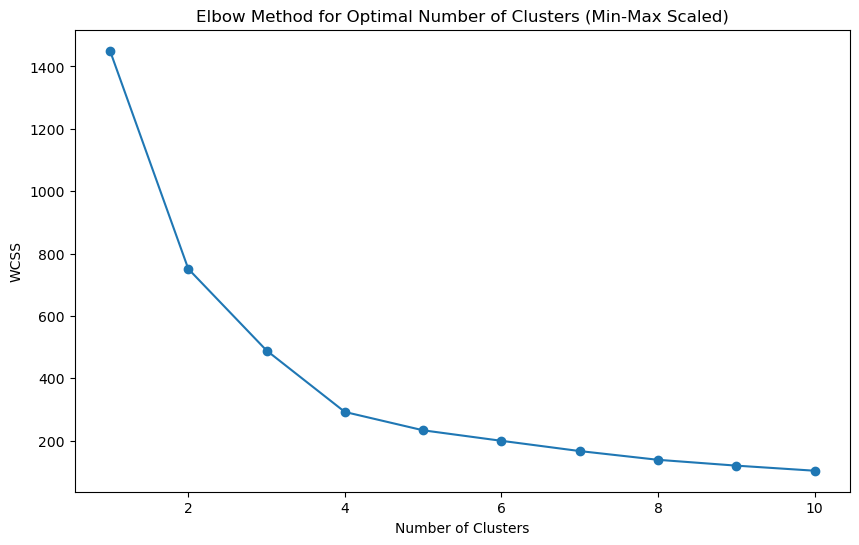

Saved Elbow Method plot: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\optimal_clusters\elbow_method_min-max_scaled.png


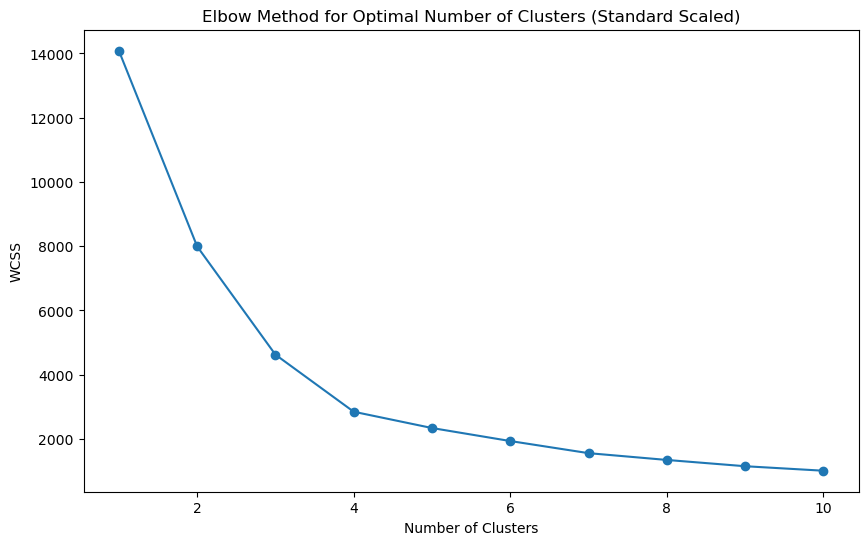

Saved Elbow Method plot: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\optimal_clusters\elbow_method_standard_scaled.png


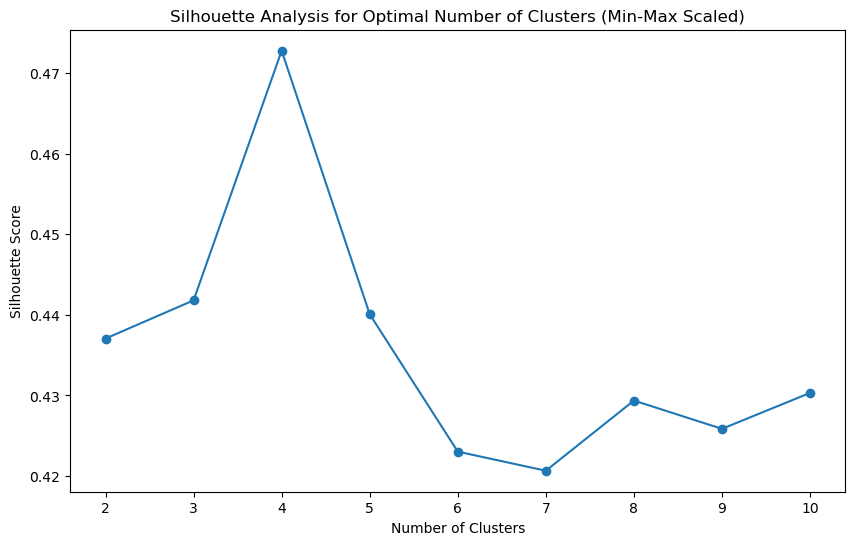

Saved Silhouette Analysis plot: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\optimal_clusters\silhouette_analysis_min-max_scaled.png


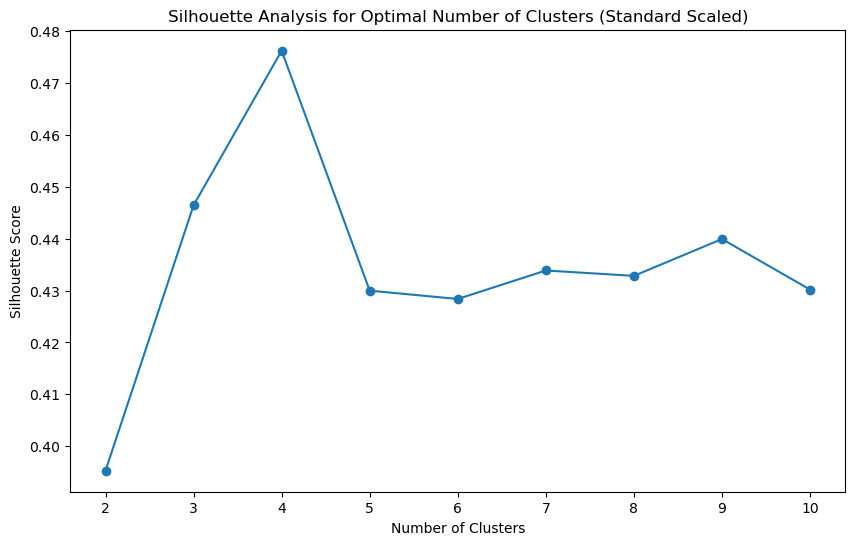

Saved Silhouette Analysis plot: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\optimal_clusters\silhouette_analysis_standard_scaled.png


In [25]:
# Apply the Elbow Method and Silhouette Analysis to determine the optimal number of clusters for both datasets
determine_optimal_clusters(df_min_max_scaled, 'Min-Max Scaled')
determine_optimal_clusters(df_standard_scaled, 'Standard Scaled')
determine_optimal_clusters_with_silhouette(df_min_max_scaled, 'Min-Max Scaled')
determine_optimal_clusters_with_silhouette(df_standard_scaled, 'Standard Scaled')

### Interpretation and Choosing the Optimal Number of Clusters

 After generating and visualizing the plots for both the Min-Max scaled data and the Standard scaled data, we observed that the plots for each method (Elbow Method and Silhouette Analysis) look very similar across both scaling techniques. This suggests that the scaling method does not significantly impact the determination of the optimal number of clusters in this case. Here's the combined interpretation:

- Elbow Method Interpretation:
The Elbow Method plots for both the Min-Max scaled data and the Standard scaled data display a noticeable "elbow" at 4 clusters. This indicates that 4 clusters provide a good balance between the compactness of clusters (measured by WCSS) and the simplicity of the model. Beyond 4 clusters, the decrease in WCSS starts to taper off, meaning that adding more clusters would only marginally improve the compactness while increasing the model's complexity.

- Silhouette Analysis Interpretation:
The Silhouette Analysis plots for both scaling methods also show that the Silhouette Score peaks at 4 clusters. This peak suggests that 4 clusters provide the most cohesive and well-separated grouping of data points. A higher Silhouette Score indicates that the clusters are distinct and well-defined, with data points being closer to their own cluster's centroid compared to other clusters.usters.

## Summary:
Optimal Number of Clusters: The Elbow Method and Silhouette Analysis consistently indicate that 4 is the optimal number of clusters for both the Min-Max scaled data and the Standard scaled data.

Reasonin
g: Elbow Method: The "elbow" at 4 clusters shows that this is the point where the within-cluster sum of squares (WCSS) starts to decrease more slowly, indicating diminishing returns with additional clusters. Silhouette Analysis: The peak Silhouette Score at 4 clusters confirms that the clustering is both strong and meaningful, with well-separated clusters.

## Conclusion
Based on the Elbow Method and Silhouette Analysis, the optimal number of clusters for this dataset is 4, regardless of whether Min-Max scaling or Standard scaling is applied. The consistency across both scaling methods suggests that the natural grouping within the data is robust to the type of scaling used.

Application: With 4 clusters identified, you can now proceed to label the clusters, analyze their characteristics, and apply these insights to areas such as customer segmentation, marketing strategies, or targeted interventions. Efficiency: By noting the similarity in the results between the two scaling methods, you can streamline future analyses by focusing on a single scaling approach if desired.

# Train the Clustering model and interpret results

### Step 1: Fitting the K-Means Model and Applying It to the Datasets
#### Purpose:
In this step, we will fit the K-Means clustering algorithm to our customer datasets and apply it to both the Min-Max scaled and Standard scaled datasets. By clustering the customers into 4 groups, we aim to identify segments based on their tenure and monthly charges. This will help us understand the natural groupings within the data.

#### Role of the Code:
The function `fit_kmeans_and_analyze` will apply the K-Means algorithm to the datasets. It will assign each customer to one of the 4 clusters, save the results to a file, and update our configuration file to include the path to these results. We will call this function twice: once for the Min-Max scaled data and once for the Standard scaled data. This ensures that we generate clusters for both versions of our dataset and understand how clustering works across different scaling methods.

#### Expected Outcome:
After running this code, both datasets will have an additional column that indicates the cluster each customer belongs to. The cluster assignments will be saved in CSV files for both the Min-Max scaled and Standard scaled datasets, and the paths to these files will be updated in our configuration file.

In [26]:
# Utility function to convert absolute path to relative path
def to_relative_path(absolute_path, start_path):
    return os.path.relpath(absolute_path, start=start_path).replace('\\', '/')

# Function to fit KMeans and analyze clusters
def fit_kmeans_and_analyze(df, scaling_label):
    # Fit the KMeans model with 4 clusters
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(df[['tenure', 'MonthlyCharges']])
    
    # Display the first few rows with cluster assignments
    print(f"{scaling_label} Dataset with Cluster Assignments:")
    print(df.head())
    
    # Ensure the correct paths for saving results
    kmeans_model_path = os.path.join(project_root, 'Clustering_Analysis', 'kmeans_model')
    os.makedirs(kmeans_model_path, exist_ok=True)
    
    # Save the DataFrame with cluster assignments
    result_filename = f'{scaling_label.lower().replace(" ", "_")}_4_clusters.csv'
    result_filepath = os.path.join(kmeans_model_path, result_filename)
    df.to_csv(result_filepath, index=False)
    print(f'Saved cluster assignments to: {result_filepath}')
    
    # Update the config file with the new path for cluster assignments
    relative_result_filepath = to_relative_path(result_filepath, project_root)
    config[f'{scaling_label.lower().replace(" ", "_")}_4_clusters_path'] = relative_result_filepath

    with open(config_path, 'w') as f:
        json.dump(config, f, indent=4)
    print(f"Updated config.json with new path for {scaling_label} cluster assignments.")



In [27]:
# Perform clustering analysis on both datasets
fit_kmeans_and_analyze(df_min_max_scaled, 'Min-Max Scaled')
fit_kmeans_and_analyze(df_standard_scaled, 'Standard Scaled')

Min-Max Scaled Dataset with Cluster Assignments:
   SeniorCitizen    tenure  MonthlyCharges  gender_Female  gender_Male  \
0            0.0  0.013889        0.115423            1.0          0.0   
1            0.0  0.472222        0.385075            0.0          1.0   
2            0.0  0.027778        0.354229            0.0          1.0   
3            0.0  0.625000        0.239303            0.0          1.0   
4            0.0  0.027778        0.521891            1.0          0.0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0            1.0             0.0              1.0               0.0   
1            1.0             0.0              0.0               1.0   
2            1.0             0.0              0.0               1.0   
3            1.0             0.0              1.0               0.0   
4            1.0             0.0              0.0               1.0   

   MultipleLines_No  MultipleLines_Yes  InternetService_DSL  \
0               

#### Step 2: Analyzing Cluster Characteristics
We will use the `analyze_and_save_cluster_characteristics` function to calculate statistics (mean, median, std) for tenure and charges within each cluster. This will help us understand customer segments. The results will be saved as CSV files for both datasets.

In [28]:
def analyze_and_save_cluster_characteristics(df, scaling_label):
    # Ensure the correct paths for saving results
    kmeans_model_path = os.path.join(project_root, 'Clustering_Analysis', 'kmeans_model')
    os.makedirs(kmeans_model_path, exist_ok=True)
    
    # Analyze the cluster characteristics
    cluster_characteristics = df.groupby('Cluster').agg({
        'tenure': ['mean', 'median', 'std'],
        'MonthlyCharges': ['mean', 'median', 'std']
    })
    print(f"\nCluster Characteristics ({scaling_label}):")
    print(cluster_characteristics)
    
    # Save the cluster characteristics
    characteristics_filename = f'{scaling_label.lower().replace(" ", "_")}_cluster_characteristics.csv'
    characteristics_filepath = os.path.join(kmeans_model_path, characteristics_filename)
    cluster_characteristics.to_csv(characteristics_filepath)
    print(f'Saved cluster characteristics to: {characteristics_filepath}')
    
    # Update the config file with the new path for cluster characteristics
    relative_characteristics_filepath = to_relative_path(characteristics_filepath, project_root)
    config[f'{scaling_label.lower().replace(" ", "_")}_cluster_characteristics_path'] = relative_characteristics_filepath

    with open(config_path, 'w') as f:
        json.dump(config, f, indent=4)
    print(f"Updated config.json with new path for {scaling_label} cluster characteristics.")

In [29]:
# Analyze and save characteristics for both datasets
analyze_and_save_cluster_characteristics(df_min_max_scaled, 'Min-Max Scaled')
analyze_and_save_cluster_characteristics(df_standard_scaled, 'Standard Scaled')


Cluster Characteristics (Min-Max Scaled):
           tenure                     MonthlyCharges                    
             mean    median       std           mean    median       std
Cluster                                                                 
0        0.750337  0.750000  0.169414       0.156741  0.068657  0.154691
1        0.209403  0.180556  0.155150       0.626087  0.616418  0.125928
2        0.820249  0.847222  0.151989       0.742269  0.758458  0.141034
3        0.143104  0.111111  0.126619       0.138631  0.067910  0.134705
Saved cluster characteristics to: C:\Users\kusha\OneDrive\Documents\Customer-Churn-Analysis-main\Clustering_Analysis\kmeans_model\min-max_scaled_cluster_characteristics.csv
Updated config.json with new path for Min-Max Scaled cluster characteristics.

Cluster Characteristics (Standard Scaled):
           tenure                     MonthlyCharges                    
             mean    median       std           mean    median       std
Clust

## Summary

| **Cluster**                                 | **Min-Max Scaled** | **Standard Scaled** | **Characteristics**                                                                                     |
|---------------------------------------------|--------------------|---------------------|---------------------------------------------------------------------------------------------------------|
| High Tenure, High Charges (Premium Customers) | Cluster 2          | Cluster 1           | Long-term, high-value customers likely subscribed to premium plans. Crucial for retention and upselling opportunities. |
| Low Tenure, Low Charges (New or Basic Customers) | Cluster 3          | Cluster 0           | New or lower-value customers. Prime targets for engagement strategies aimed at increasing value through promotions and upsell opportunities. |
| High Tenure, Low Charges (Loyal but Economical Customers) | Cluster 0          | Cluster 3           | Loyal customers who have opted for more economical plans over time. Potential to increase lifetime value through premium services or rewards. |
| Moderate Tenure and Charges (Mid-Tier Customers) | Cluster 1          | Cluster 2           | Mid-tier customers with stable tenure and charges. Potential for growth through targeted marketing and value-added services. |


# Visualization of Clustering Results
In this notebook, we will generate various visualizations to aid in the interpretation of the clustering results. These visualizations will help us understand the distribution and characteristics of the clusters formed in the customer segmentation analysis.

In [32]:
# Convert relative paths to absolute paths
project_root = os.path.dirname(os.path.dirname(os.path.abspath("_file_")))
min_max_scaled_4_clusters_path = os.path.join(project_root, config['min-max_scaled_4_clusters_path'])
standard_scaled_4_clusters_path = os.path.join(project_root, config['standard_scaled_4_clusters_path'])

# Load the datasets
df_min_max_scaled_4_clusters = pd.read_csv(min_max_scaled_4_clusters_path)
df_standard_scaled_4_clusters = pd.read_csv(standard_scaled_4_clusters_path)

# Example of printing the first few rows to verify
print("Standard Scaled 4 Clusters:")
display(df_standard_scaled_4_clusters.head())

print("Min-Max Scaled 4 Clusters:")
display(df_min_max_scaled_4_clusters.head())

Standard Scaled 4 Clusters:


SeniorCitizen    tenure  MonthlyCharges  gender_Female  gender_Male  \
0      -0.439916 -1.277445       -1.160323       1.009559    -1.009559   
1      -0.439916  0.066327       -0.259629      -0.990532     0.990532   
2      -0.439916 -1.236724       -0.362660      -0.990532     0.990532   
3      -0.439916  0.514251       -0.746535      -0.990532     0.990532   
4      -0.439916 -1.236724        0.197365       1.009559    -1.009559   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0       0.654012       -0.654012         3.054010         -3.054010   
1       0.654012       -0.654012        -0.327438          0.327438   
2       0.654012       -0.654012        -0.327438          0.327438   
3       0.654012       -0.654012         3.054010         -3.054010   
4       0.654012       -0.654012        -0.327438          0.327438   

   MultipleLines_No  MultipleLines_Yes  InternetService_DSL  \
0          0.854176          -0.854176             0.885660   
1          0.854176          -0.854176             0.885660   
2          0.854176          -0.854176             0.885660   
3          0.854176          -0.854176             0.885660   
4          0.854176          -0.854176            -1.129102   

   InternetService_Fiber optic  Contract_Month-to-month  Contract_One year  \
0                    -0.885660                 0.904184          -0.514249   
1                    -0.885660                -1.105970           1.944582   
2                    -0.885660                 0.904184          -0.514249   
3                    -0.885660                -1.105970           1.944582   
4                     1.129102                 0.904184          -0.514249   

   Contract_Two year  Churn_No  Churn_Yes  Cluster  
0          -0.562975  0.601023  -0.601023        0  
1          -0.562975  0.601023  -0.601023        2  
2          -0.562975 -1.663829   1.663829        0  
3          -0.562975  0.601023  -0.601023        3  
4          -0.562975 -1.663829   1.663829        2

Min-Max Scaled 4 Clusters:


SeniorCitizen    tenure  MonthlyCharges  gender_Female  gender_Male  \
0            0.0  0.013889        0.115423            1.0          0.0   
1            0.0  0.472222        0.385075            0.0          1.0   
2            0.0  0.027778        0.354229            0.0          1.0   
3            0.0  0.625000        0.239303            0.0          1.0   
4            0.0  0.027778        0.521891            1.0          0.0   

   Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0            1.0             0.0              1.0               0.0   
1            1.0             0.0              0.0               1.0   
2            1.0             0.0              0.0               1.0   
3            1.0             0.0              1.0               0.0   
4            1.0             0.0              0.0               1.0   

   MultipleLines_No  MultipleLines_Yes  InternetService_DSL  \
0               1.0                0.0                  1.0   
1               1.0                0.0                  1.0   
2               1.0                0.0                  1.0   
3               1.0                0.0                  1.0   
4               1.0                0.0                  0.0   

   InternetService_Fiber optic  Contract_Month-to-month  Contract_One year  \
0                          0.0                      1.0                0.0   
1                          0.0                      0.0                1.0   
2                          0.0                      1.0                0.0   
3                          0.0                      0.0                1.0   
4                          1.0                      1.0                0.0   

   Contract_Two year  Churn_No  Churn_Yes  Cluster  
0                0.0       1.0        0.0        3  
1                0.0       1.0        0.0        1  
2                0.0       0.0        1.0        3  
3                0.0       1.0        0.0        0  
4                0.0       0.0        1.0        1

### Defining the Visualization Functions
In this step, we will define several functions to generate different types of visualizations:

- Scatter Plot with Centroids:
Visualize the distribution of customers within clusters, along with the cluster centroids.
- Boxplots:
Show the distribution of tenure and monthly charges within each cluster.
- Cluster Distribution Plot:
Display the number of customers in each cluster.
- Heatmap of Cluster Characteristics:
  Summarize the mean tenure and monthly charges for each cluster using a heatmap.
  
These visualizations will provide insights into the characteristics and distribution of each cluster, making it easier to interpret the results of the clustering analysis.

In [33]:
# Define the path for saving visualizations
visualizations_path = os.path.join(project_root, 'Clustering_Analysis', 'visualizations')
os.makedirs(visualizations_path, exist_ok=True)

# Function to compute centroids
def compute_centroids(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['tenure', 'MonthlyCharges']])
    centroids = kmeans.cluster_centers_
    return centroids

# Function to plot scatter plot of clusters with centroids
def plot_cluster_scatter(df, scaling_label, save_path, n_clusters):
    centroids = compute_centroids(df, n_clusters)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'Customer Segments based on Tenure and Monthly Charges ({scaling_label})')
    plt.xlabel('Tenure')
    plt.ylabel('Monthly Charges')
    plt.legend(title='Cluster')
    plt.tight_layout()
    file_path = os.path.join(save_path, f'cluster_scatter_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    plt.show() 
    plt.close()

# Function to plot boxplots of clusters
def plot_cluster_boxplots(df, scaling_label, save_path):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='tenure', data=df, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Tenure by Cluster ({scaling_label})')
    plt.xlabel('Cluster')
    plt.ylabel('Tenure')
    plt.tight_layout()
    file_path_tenure = os.path.join(save_path, f'cluster_boxplot_tenure_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path_tenure)
    plt.show() 
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y='MonthlyCharges', data=df, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Monthly Charges by Cluster ({scaling_label})')
    plt.xlabel('Cluster')
    plt.ylabel('Monthly Charges')
    plt.tight_layout()
    file_path_charges = os.path.join(save_path, f'cluster_boxplot_charges_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path_charges)
    plt.show() 
    plt.close()

# Function to plot distribution of clusters
def plot_cluster_distribution(df, scaling_label, save_path):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', data=df, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'Cluster Distribution ({scaling_label})')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.tight_layout()
    file_path = os.path.join(save_path, f'cluster_distribution_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    plt.show() 
    plt.close()

# Function to plot heatmap of cluster characteristics
def plot_cluster_heatmap(df, scaling_label, save_path):
    cluster_summary = df.groupby('Cluster').agg({
        'tenure': 'mean',
        'MonthlyCharges': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_summary.set_index('Cluster').T, annot=True, cmap='viridis')
    plt.title(f'Cluster Heatmap ({scaling_label})')
    plt.tight_layout()
    file_path = os.path.join(save_path, f'cluster_heatmap_{scaling_label.lower().replace(" ", "_")}.png')
    plt.savefig(file_path)
    plt.show() 
    plt.close()

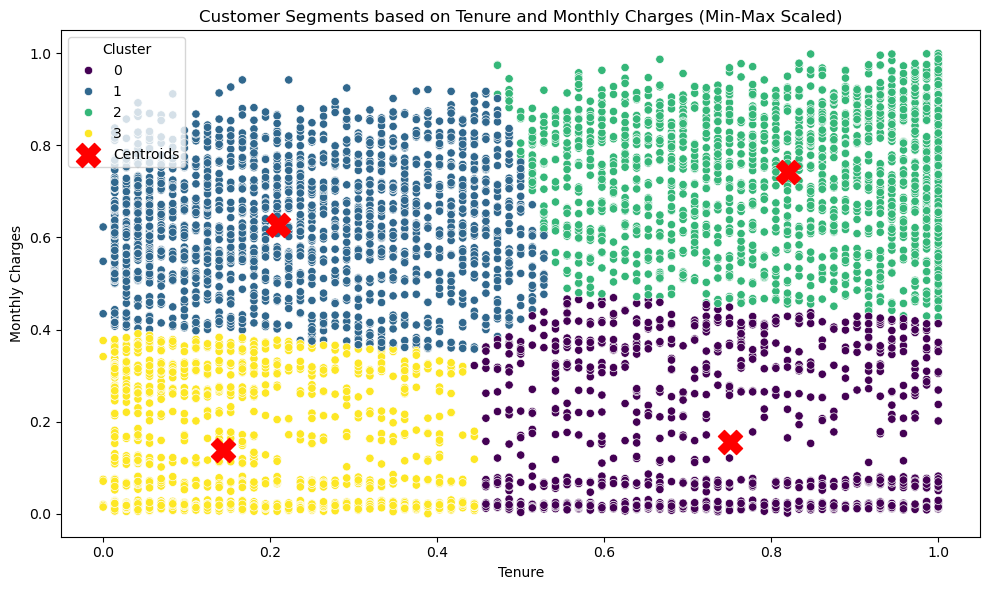

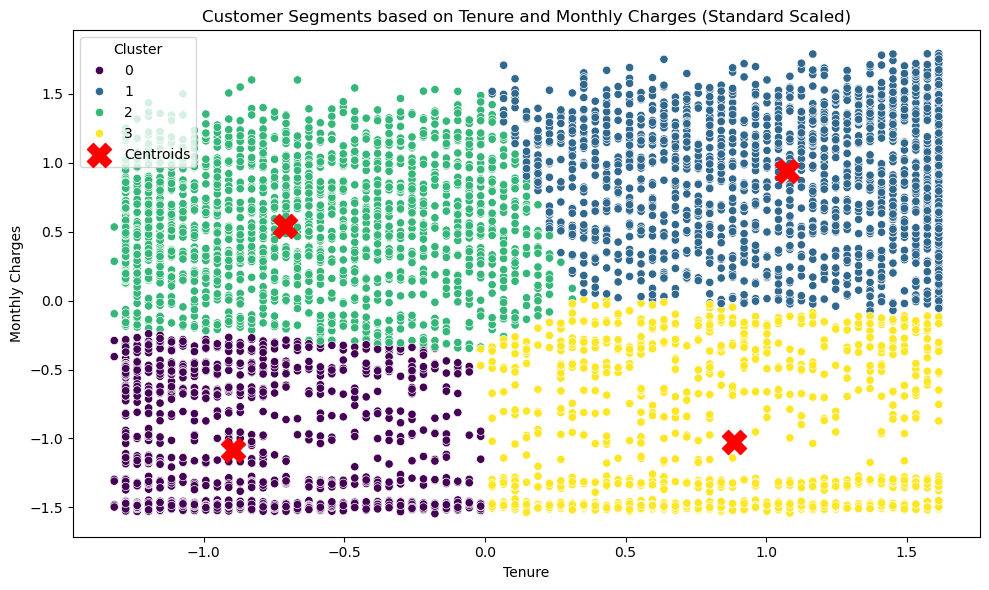

In [34]:
# Generate visualizations for Min-Max scaled clusters and standard scaled clusters
plot_cluster_scatter(df_min_max_scaled_4_clusters, 'Min-Max Scaled', visualizations_path, n_clusters=4)
plot_cluster_scatter(df_standard_scaled_4_clusters, 'Standard Scaled', visualizations_path, n_clusters=4)

### First Plot: Min-Max Scaled Data
This plot displays customer segments based on Min-Max scaled tenure and monthly charges. K-means clustering reveals four clusters, each color-coded, with centroids marked by red "X" symbols. Min-Max scaling normalizes the data, clearly showing how customers are grouped based on their relative valuesues.

### Second Plot: Standard Scaled Data
This plot shows customer segments based on standardized tenure and monthly charges. Four distinct clusters are identified using K-means, each represented by different colors, with red "X" marks indicating the centroids. Standard scaling ensures equal contribution from both features in forming clear, separated customer groups. ues.

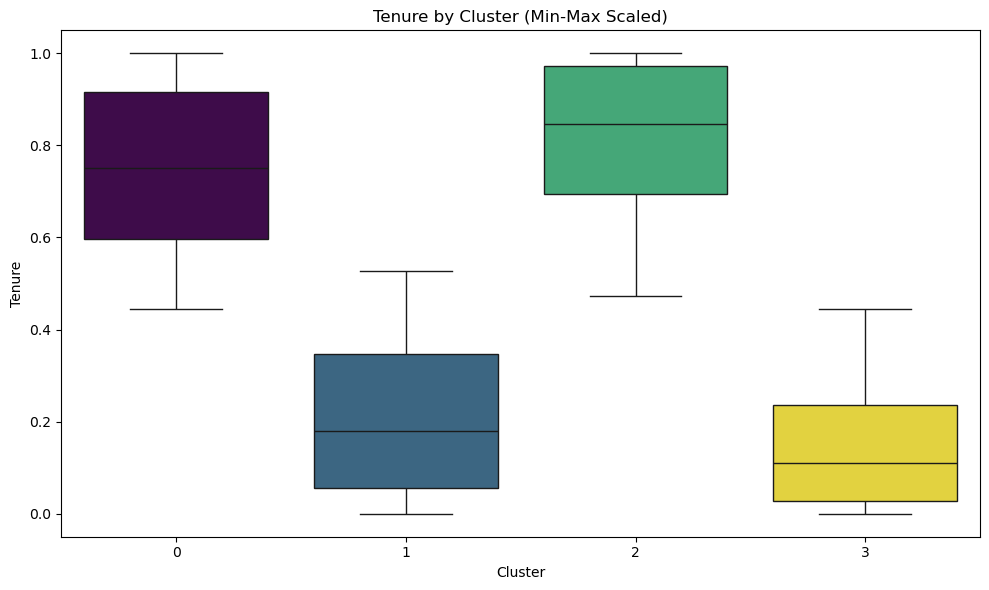

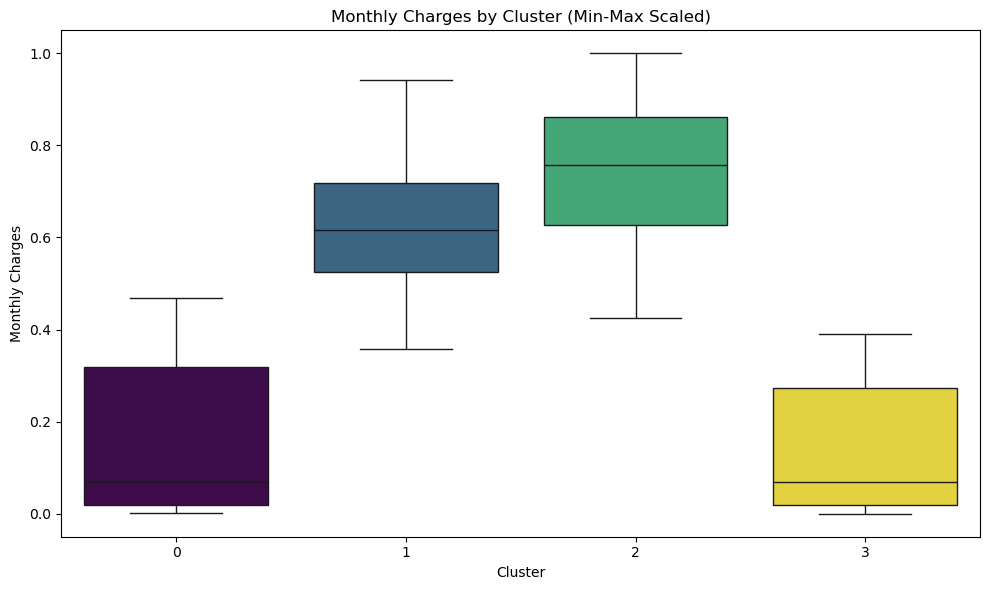

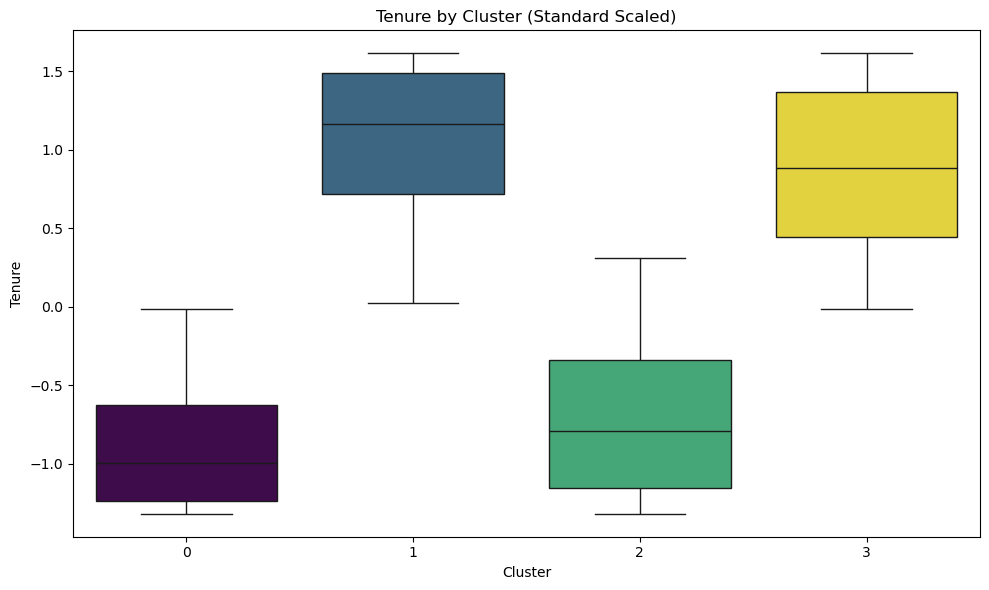

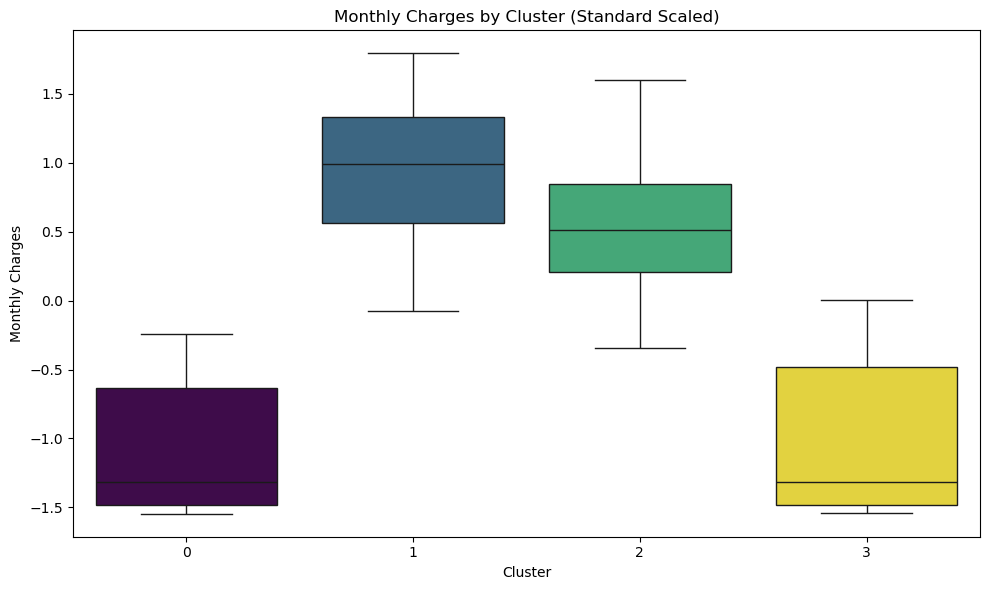

In [35]:
#plot_cluster_boxplots for both min-max and standard scaled data
plot_cluster_boxplots(df_min_max_scaled_4_clusters, 'Min-Max Scaled', visualizations_path)
plot_cluster_boxplots(df_standard_scaled_4_clusters, 'Standard Scaled', visualizations_path)

### 
- Monthly Charges by Cluster (Min-Max Scaled):
This box plot shows the distribution of monthly charges across customer clusters using Min-Max scaling. Charges are normalized to a [0, 1] range, allowing easy comparison of the median, quartiles, and spread within each cluster.

- Monthly Charges by Cluster (Standard Scaled):
This box plot displays monthly charges across clusters with data standardized to have a mean of zero and a standard deviation of one. It highlights variations in charge distributions and central tendencies across clusters.

- Tenure by Cluster (Min-Max Scaled):
This box plot presents customer tenure distribution across clusters, normalized using Min-Max scaling. It shows the range and median tenure within the [0, 1] range for each cluster.

- Tenure by Cluster (Standard Scaled):
This box plot illustrates tenure distribution across clusters after standard scaling, with values normalized to a mean of zero. It provides a clear comparison of median and spread of tenure across clusters.

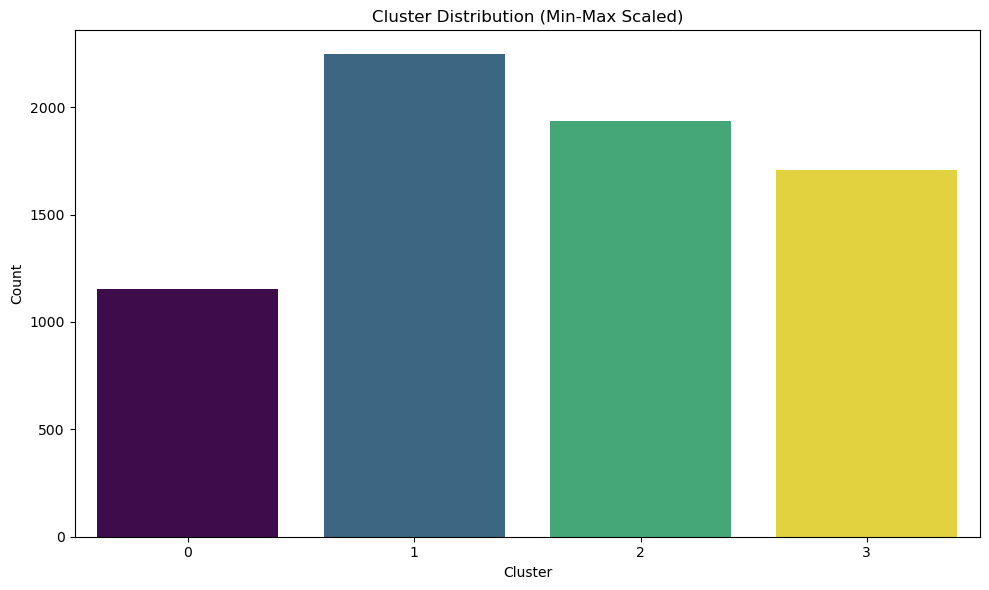

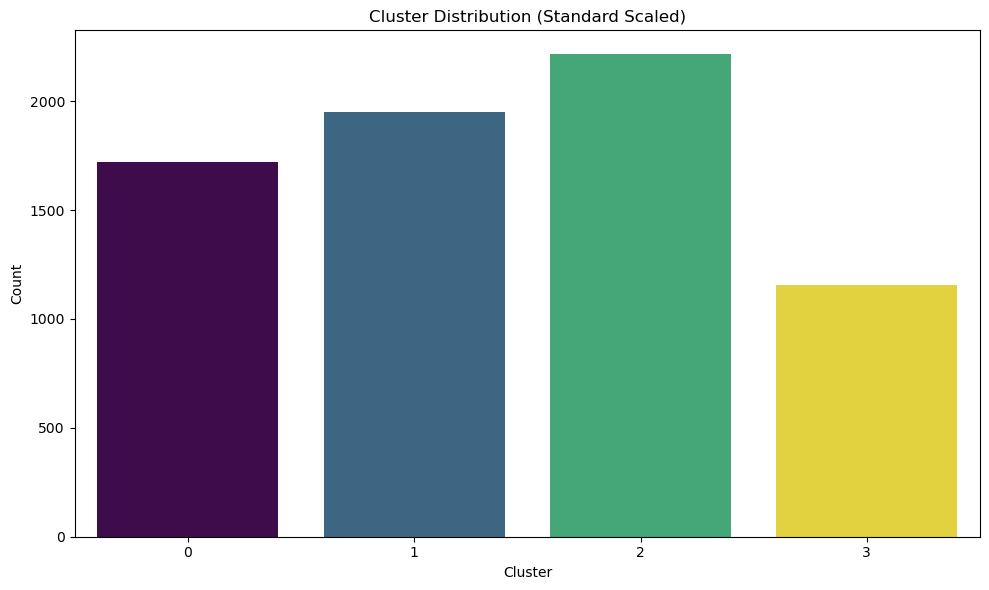

In [36]:
# plot_cluster_distribution for both min-max and stanadard data
plot_cluster_distribution(df_min_max_scaled_4_clusters, 'Min-Max Scaled', visualizations_path)
plot_cluster_distribution(df_standard_scaled_4_clusters, 'Standard Scaled', visualizations_path)

### First Plot: Cluster Distribution (Min-Max Scaled)
This bar plot shows the distribution of customers across clusters using Min-Max scaled data. Each bar represents the number of customers in each cluster, with the data normalized to the [0, 1] range. The plot highlights how the clusters are populated after applying Min-Max scaling, with cluster 1 having the highest count and cluster 0 the lowest.

### Second Plot: Cluster Distribution (Standard Scaled)
This bar plot displays the distribution of customers across clusters using standardized data, where the features have a mean of zero and a standard deviation of one. The plot shows how the clusters are distributed, with cluster 2 having the most customers and cluster 3 the fewest.

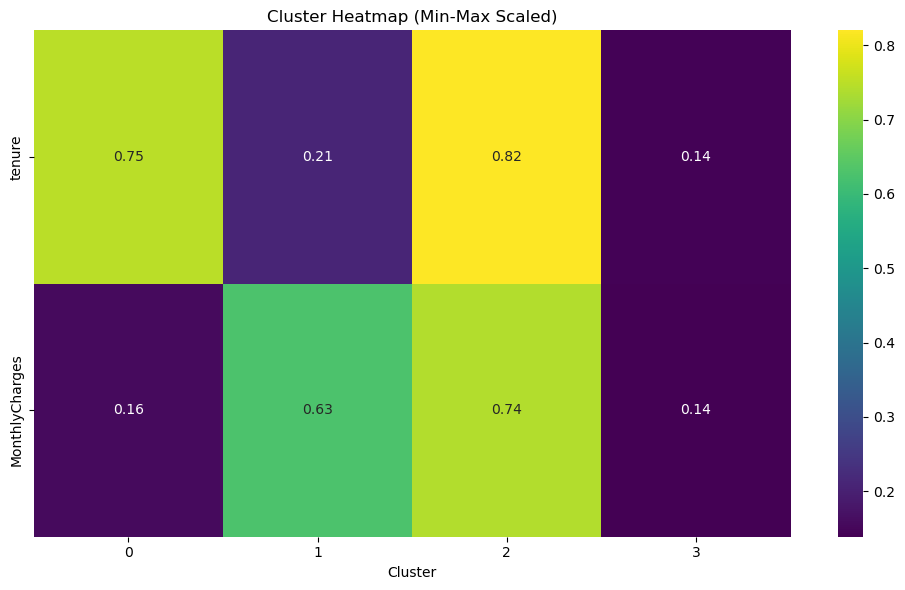

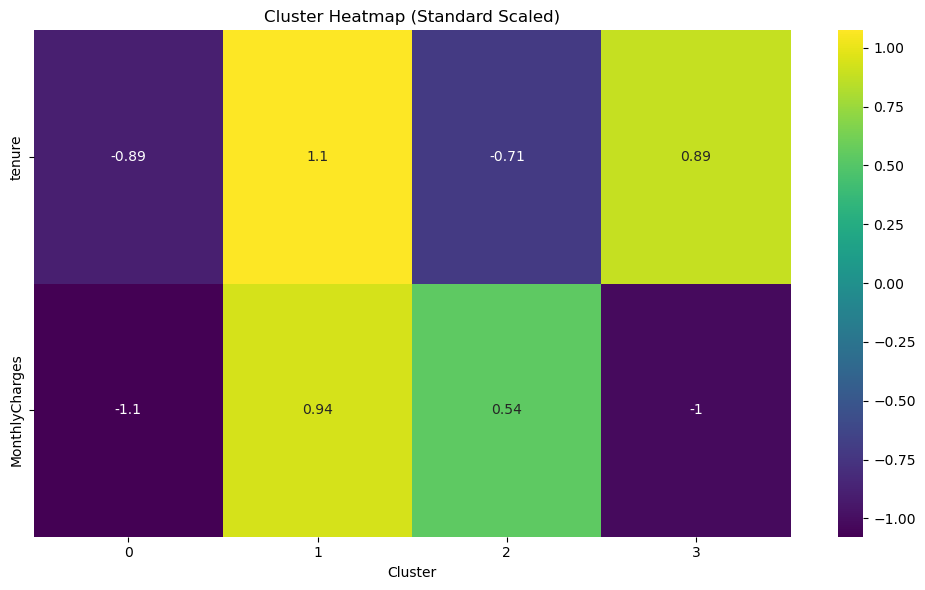

In [37]:
# plot_cluster_heatmap for both min_max scaled and standard scaled data
plot_cluster_heatmap(df_min_max_scaled_4_clusters, 'Min-Max Scaled', visualizations_path)
plot_cluster_heatmap(df_standard_scaled_4_clusters, 'Standard Scaled', visualizations_path)

### First Plot: Cluster Heatmap (Min-Max Scaled)
This heatmap illustrates the average values of tenure and monthly charges across different customer clusters after applying Min-Max scaling. The values are normalized within the [0, 1] range, showing how each cluster compares in terms of these two features. The color intensity represents the scaled values, with higher values in yellow and lower values in purple, helping to visually distinguish the characteristics of each cluster.

### Second Plot: Cluster Heatmap (Standard Scaled)
This heatmap shows the average values of tenure and monthly charges across customer clusters using standardized data, where features have been normalized to have a mean of zero and a standard deviation of one. The color gradient highlights the differences between clusters, with positive values in yellow and negative values in purple, making it easy to compare how each cluster's features deviate from the standardized mean.

### Next Steps:
- Define the Architecture of the ANN Model
- Train the ANN Model and Optimize Convergence
- Predict Customer Churn Based on Critical Attributes